Luis Pedro Pérez - 22008067
Maestría en Business Intelligence


# Laboratorio 2

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Se carga y se realiza una exploración de datos preliminar

In [176]:
dataHP = pd.read_csv('train_HP.csv')
print(dataHP.shape)
dataHP.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Se determinan los tipos de datos

In [177]:
dataHP.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Selección de columnas NaN

In [178]:
cols_con_na=[col for col in dataHP.columns if (dataHP[col].isnull().any())]
print(cols_con_na)
print(f"Se tienen {len(cols_con_na)} columnas con NA")


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Se tienen 19 columnas con NA


In [179]:
# Se extrae la media de las columnas con Null
dataHP[cols_con_na].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

## Selección de columnas no NaN

Se extraerán las columnas que tienen una media de NaN menor a 0.05. Se descartarán el resto de las columnas que tengan NaN o null debido a que no aportan información al análisis

In [180]:
cols_no_nan=[col for col in dataHP.columns if (dataHP[col].isnull().mean()<=0.05)]
print(cols_no_nan)
print(f"El total de columnas para el análisis es: {len(cols_no_nan)}")

['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
El total de columnas para el análisis es: 70


Se extraen columnas con NA y se identifica su tipo

In [181]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

Se obtiene la media de valores nulos.

In [182]:
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [183]:
cols_analisis=list(set(cols_no_nan).intersection(set(cols_con_na)))
print(cols_analisis)
print(f"El total de columnas a analizar es: {len(cols_analisis)}")

['BsmtFinType2', 'Electrical', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea', 'BsmtCond', 'BsmtQual', 'BsmtExposure']
El total de columnas a analizar es: 8


Se procederán a imputar las 8 columnas resultantes

## Imputación media y mediana

Se procederá a inspeccionar las columnas a cambiar.

In [184]:
dataHP[cols_analisis].head()

,BsmtFinType2,Electrical,BsmtFinType1,MasVnrType,MasVnrArea,BsmtCond,BsmtQual,BsmtExposure
0,Unf,SBrkr,GLQ,BrkFace,196.0,TA,Gd,No
1,Unf,SBrkr,ALQ,None,0.0,TA,Gd,Gd
2,Unf,SBrkr,GLQ,BrkFace,162.0,TA,Gd,Mn
3,Unf,SBrkr,ALQ,None,0.0,Gd,TA,No
4,Unf,SBrkr,GLQ,BrkFace,350.0,TA,Gd,Av


Se determina el tipo de las columnas

In [185]:
dataHP[cols_analisis].dtypes

BsmtFinType2     object
Electrical       object
BsmtFinType1     object
MasVnrType       object
MasVnrArea      float64
BsmtCond         object
BsmtQual         object
BsmtExposure     object
dtype: object

Se procederá a realizar la imputación de la columna con valores numéricos 'MasVnrArea'

### Imputación columna MasVnrArea

In [186]:
media= dataHP['MasVnrArea'].mean()
mediana = dataHP['MasVnrArea'].median()
print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 103.68526170798899
Mediana: 0.0


Se crean las columnas con los valores imputados

In [187]:
dataHP['MasVnrArea_Mean'] = np.round(dataHP['MasVnrArea'].fillna(media), 0)
dataHP['MasVnrArea_Median'] = np.round(dataHP['MasVnrArea'].fillna(mediana), 0)
dataHP[['MasVnrArea','SalePrice','MasVnrArea_Mean','MasVnrArea_Median']]

,MasVnrArea,SalePrice,MasVnrArea_Mean,MasVnrArea_Median
0,196.0,208500,196.0,196.0
1,0.0,181500,0.0,0.0
2,162.0,223500,162.0,162.0
3,0.0,140000,0.0,0.0
4,350.0,250000,350.0,350.0
...,...,...,...,...
1455,0.0,175000,0.0,0.0
1456,119.0,210000,119.0,119.0
1457,0.0,266500,0.0,0.0
1458,0.0,142125,0.0,0.0


Se grafica para validar las imputaciones

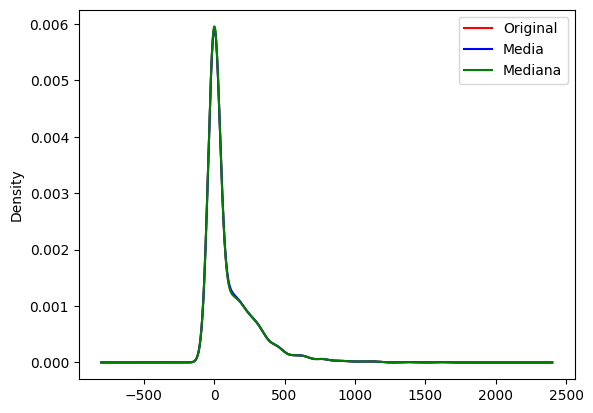

In [188]:
fig= plt.figure()
ax = fig.add_subplot(111)

dataHP['MasVnrArea'].plot.density(color='red', label= 'Original')
dataHP['MasVnrArea_Mean'].plot.density(color='blue', label= "Media")
dataHP['MasVnrArea_Median'].plot.density(color='green', label= "Mediana")
ax.legend()

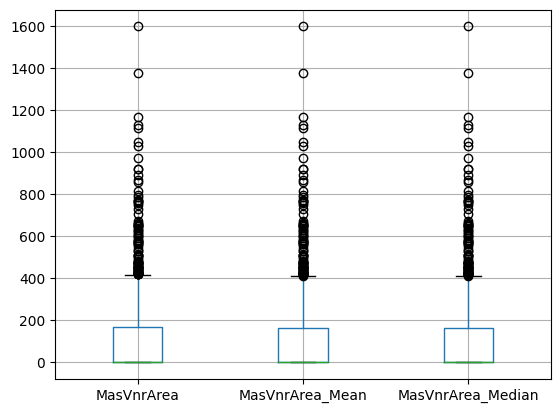

In [189]:
dataHP[['MasVnrArea','MasVnrArea_Mean', 'MasVnrArea_Median']].boxplot()
plt.show()

Debido a que no hay distorción entre el uso de la media y la mediana, se utilizará la media para esta columna

In [190]:
dataHP['MasVnrArea']=dataHP['MasVnrArea_Mean']
#Se procede a eliminar las columnas creadas
dataHP.drop(['MasVnrArea_Mean','MasVnrArea_Median'],axis=1,inplace=True)

Debido a que se asemeja mas la gráfica de la mediana, se utilizará la mediana para esta columna

## Imputación categórica

Del listado de las columnas con NA, se extraen las que serían categóricas.

In [191]:
columnas_object = dataHP[cols_analisis].select_dtypes(include=['object']).columns
print(columnas_object)

Index(['BsmtFinType2', 'Electrical', 'BsmtFinType1', 'MasVnrType', 'BsmtCond',
       'BsmtQual', 'BsmtExposure'],
      dtype='object')


Se visualizan los datos

In [192]:
columnas_object=columnas_object.insert(7,'SalePrice')
dataset_cat_missing = dataHP[columnas_object]
dataset_cat_missing.head()

,BsmtFinType2,Electrical,BsmtFinType1,MasVnrType,BsmtCond,BsmtQual,BsmtExposure,SalePrice
0,Unf,SBrkr,GLQ,BrkFace,TA,Gd,No,208500
1,Unf,SBrkr,ALQ,None,TA,Gd,Gd,181500
2,Unf,SBrkr,GLQ,BrkFace,TA,Gd,Mn,223500
3,Unf,SBrkr,ALQ,None,Gd,TA,No,140000
4,Unf,SBrkr,GLQ,BrkFace,TA,Gd,Av,250000


Se obtienen los promedios

In [193]:
dataset_cat_missing.isnull().mean()

BsmtFinType2    0.026027
Electrical      0.000685
BsmtFinType1    0.025342
MasVnrType      0.005479
BsmtCond        0.025342
BsmtQual        0.025342
BsmtExposure    0.026027
SalePrice       0.000000
dtype: float64

#### Se realiza el análisis para la columna 'BsmtFinType2'

In [194]:
dataset_cat_missing['BsmtFinType2'].value_counts()/len(dataset_cat_missing)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

Se visualizan las categorías.

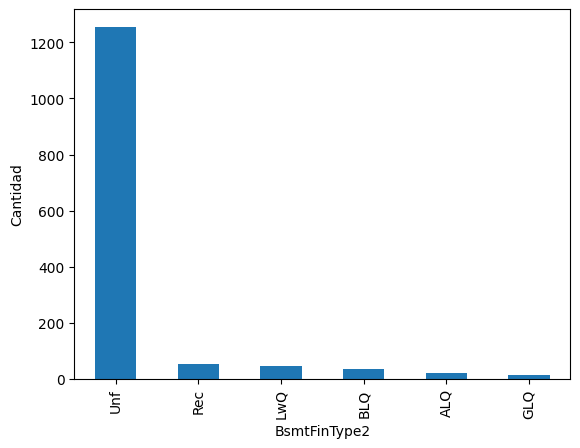

In [195]:
dataset_cat_missing['BsmtFinType2'].value_counts().plot.bar()
plt.xlabel('BsmtFinType2')
plt.ylabel('Cantidad')
plt.show()

Otra visualización

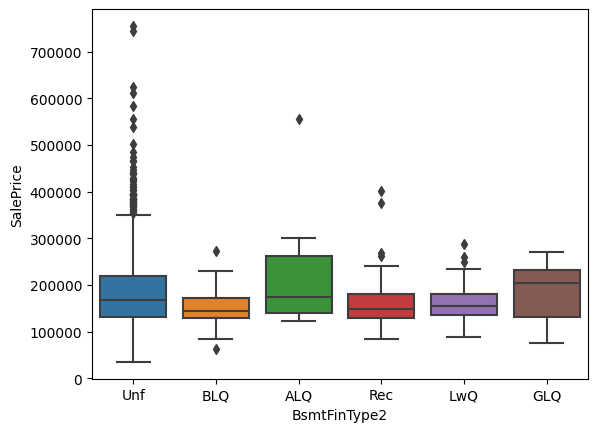

In [196]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['BsmtFinType2'], y=dataset_cat_missing['SalePrice'])
plt.show()

Se comparan las distribuciones

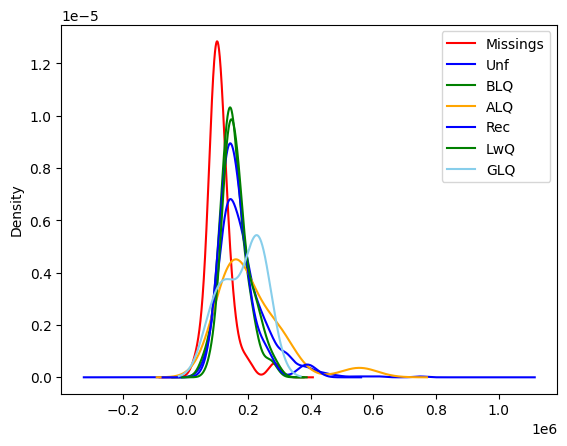

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="green", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="blue", label="Rec")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="green", label="LwQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'GLQ']['SalePrice'].plot(kind="kde", color="skyblue", label="GLQ")
ax.legend()
plt.show()


Imputación de variable categórica BLQ por semejarse a Missing

In [198]:
dataHP['BsmtFinType2'].fillna('BLQ', inplace=True) #imputación de variable categórica

#### Se realiza el análisis para la variable 'BsmtQual'

In [199]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

Se realiza el análisis para la columna BsmtQual y ver la distribución de las categorías que se tienen

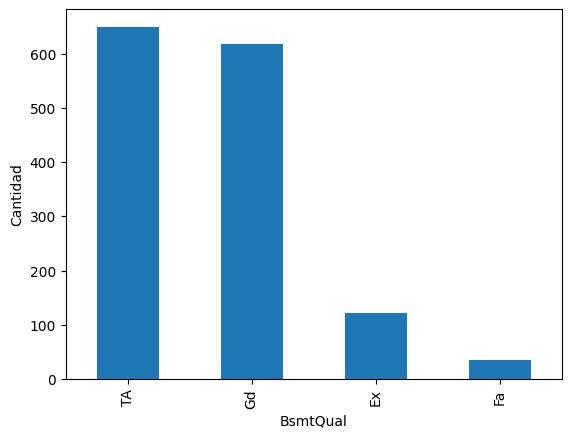

In [200]:
dataset_cat_missing['BsmtQual'].value_counts().plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Cantidad')
plt.show()

Otra visualización

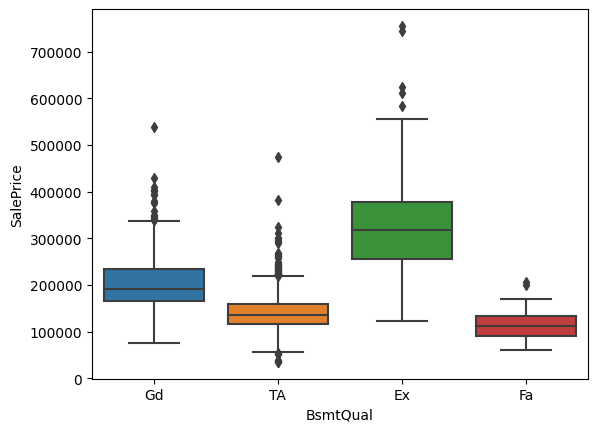

In [201]:
sns.boxplot(x=dataset_cat_missing['BsmtQual'], y=dataset_cat_missing['SalePrice'])
plt.show()

Se realiza la comparación de visualización

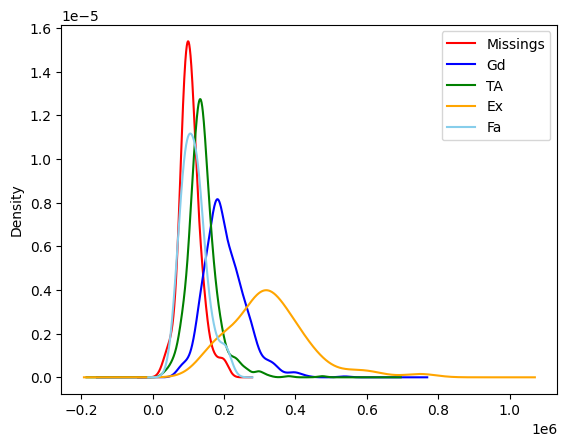

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="green", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Ex']['SalePrice'].plot(kind="kde", color="orange", label="Ex")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="skyblue", label="Fa")

ax.legend()
plt.show()


Se realiza la imputación y verificación

In [203]:
dataHP['BsmtQual'].fillna('Fa', inplace=True) #imputación de variable categórica

#### Se realiza la imputación con la variable 'Electrical'

In [204]:
dataset_cat_missing['Electrical'].value_counts()/len(dataset_cat_missing)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

Visualización de variable

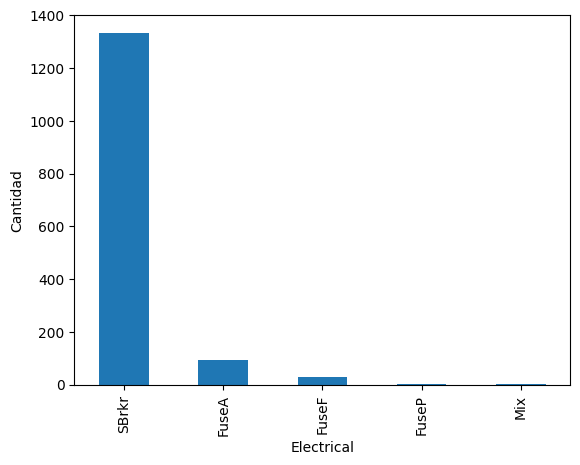

In [205]:
dataset_cat_missing['Electrical'].value_counts().plot.bar()
plt.xlabel('Electrical')
plt.ylabel('Cantidad')
plt.show()

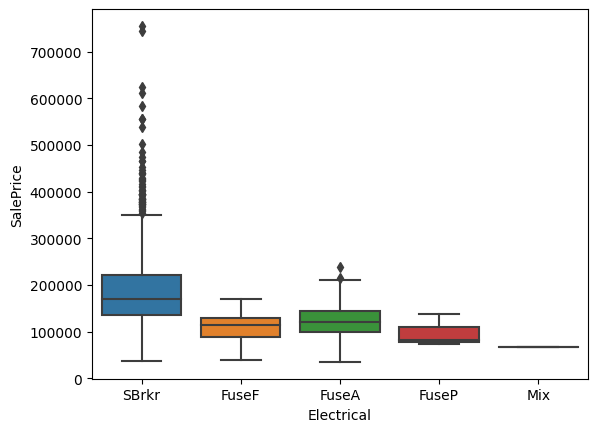

In [206]:
sns.boxplot(x=dataset_cat_missing['Electrical'], y=dataset_cat_missing['SalePrice'])
plt.show()

Se comparan las distribuciones

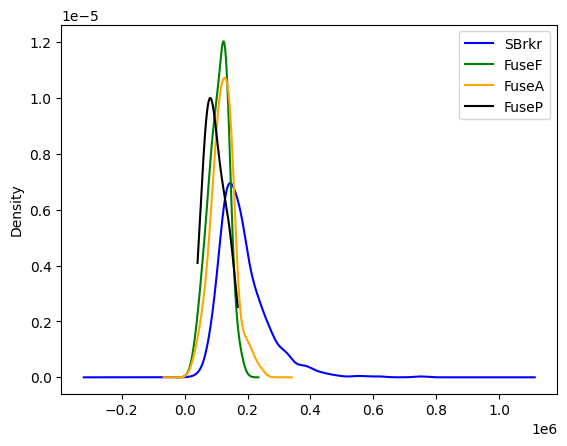

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)

#dataset_cat_missing[dataset_cat_missing['Electrical'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'SBrkr']['SalePrice'].plot(kind="kde", color="blue", label="SBrkr")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseF']['SalePrice'].plot(kind="kde", color="green", label="FuseF")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseA']['SalePrice'].plot(kind="kde", color="orange", label="FuseA")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseP']['SalePrice'].plot(kind="kde", color="black", label="FuseP")
#dataset_cat_missing[dataset_cat_missing['Electrical'] == 'Mix']['SalePrice'].plot(kind="kde", color="purple", label="Mix")

ax.legend()
plt.show()

#Se eliminan Missing y Mix por tener un solo valor

Se realiza la imputación con SBrkr ya que es la que mayor media tiene con Missing

In [208]:
dataHP['Electrical'].fillna('SBrkr', inplace=True) #imputación de variable categórica

#### Se realiza la imputación con la variable 'MasVnrType'

In [209]:
dataset_cat_missing['MasVnrType'].value_counts()/len(dataset_cat_missing)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

Visualización de variable

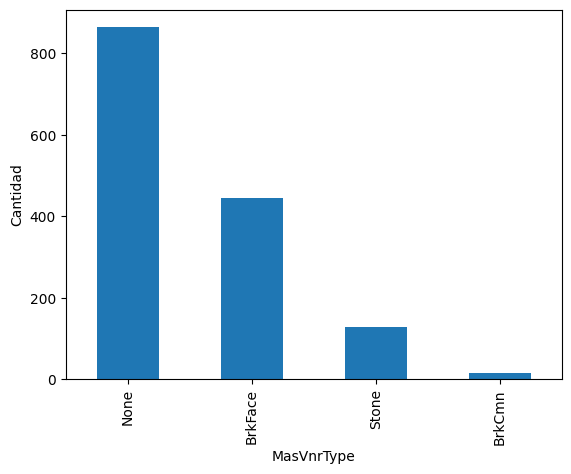

In [210]:
dataset_cat_missing['MasVnrType'].value_counts().plot.bar()
plt.xlabel('MasVnrType')
plt.ylabel('Cantidad')
plt.show()

Otra visualización

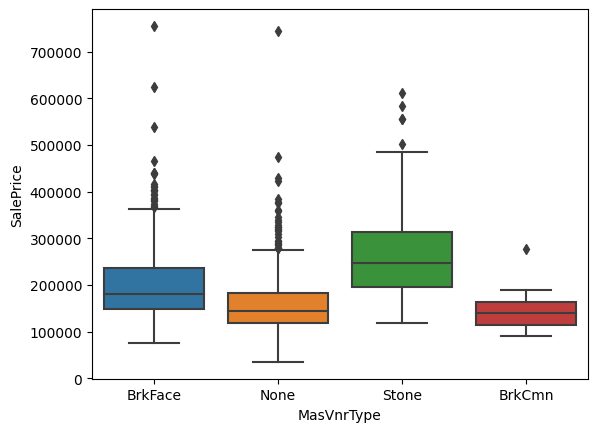

In [211]:
sns.boxplot(x=dataset_cat_missing['MasVnrType'], y=dataset_cat_missing['SalePrice'])
plt.show()

Se comparan las distribuciones

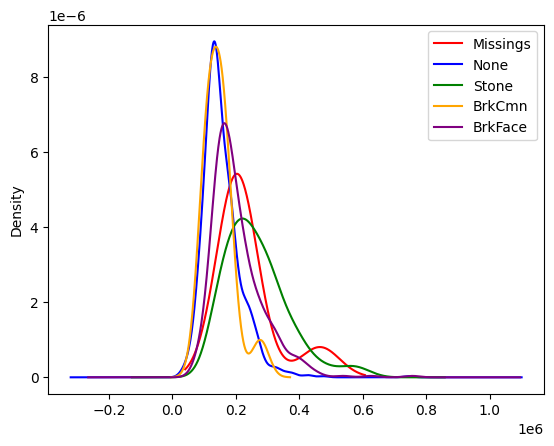

In [212]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="blue", label="None")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="green", label="Stone")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="orange", label="BrkCmn")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="purple", label="BrkFace")

ax.legend()
plt.show()

Se realiza la imputación con Stone ya que es la que mayor mayor se asemeja a Missing

In [213]:
dataHP['MasVnrType'].fillna('Stone', inplace=True) #imputación de variable categórica

#### Se realiza la imputación con la variable 'BsmtFinType1'

In [214]:
dataset_cat_missing['BsmtFinType1'].value_counts()/len(dataset_cat_missing)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

Se visualizan las categorías de la variable

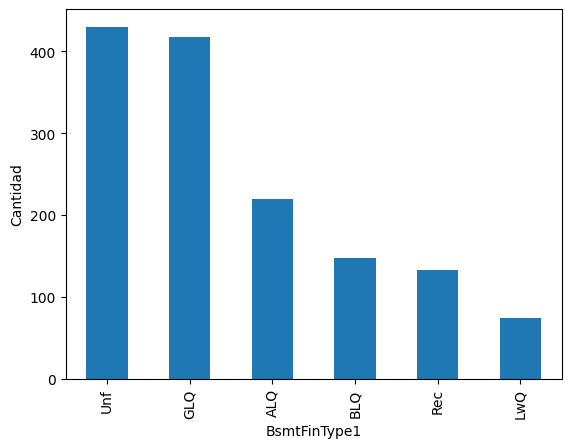

In [215]:
dataset_cat_missing['BsmtFinType1'].value_counts().plot.bar()
plt.xlabel('BsmtFinType1')
plt.ylabel('Cantidad')
plt.show()

Otra visualización

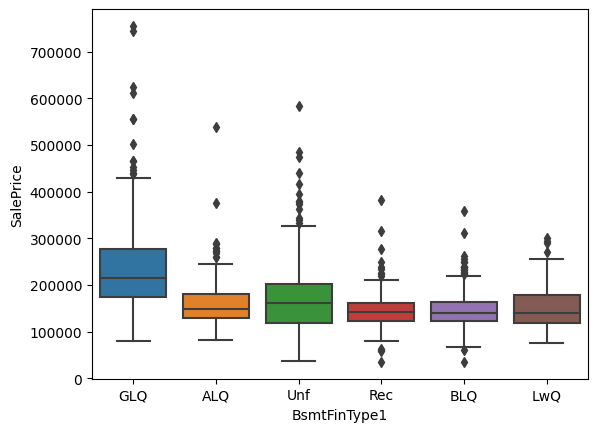

In [216]:
sns.boxplot(x=dataset_cat_missing['BsmtFinType1'], y=dataset_cat_missing['SalePrice'])
plt.show()

Se comparan distribuciones

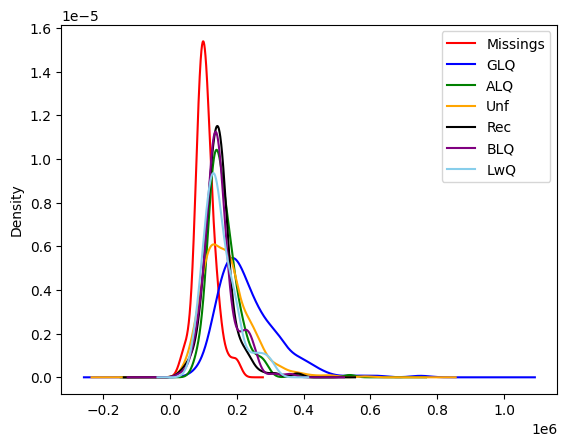

In [217]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="black", label="Rec")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="skyblue", label="LwQ")
ax.legend()
plt.show()

Se realiza la imputación con Rec ya que es la que mayor mayor se asemeja a Missing

In [218]:
dataHP['BsmtFinType1'].fillna('Rec', inplace=True) #imputación de variable categórica

#### Se realiza la imputación con la variable 'BsmtCond'

In [219]:
dataset_cat_missing['BsmtCond'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

Visualización de la variable

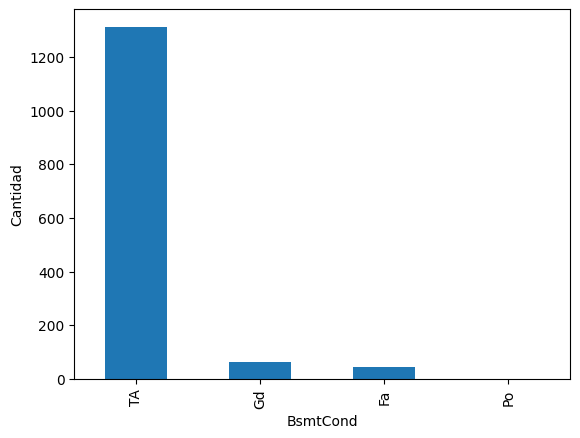

In [220]:
dataset_cat_missing['BsmtCond'].value_counts().plot.bar()
plt.xlabel('BsmtCond')
plt.ylabel('Cantidad')
plt.show()

Otra visualización

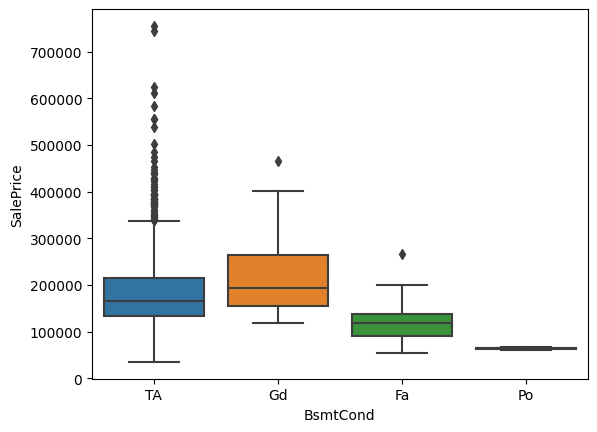

In [221]:
sns.boxplot(x=dataset_cat_missing['BsmtCond'], y=dataset_cat_missing['SalePrice'])
plt.show()

Se comparan las distribuciones

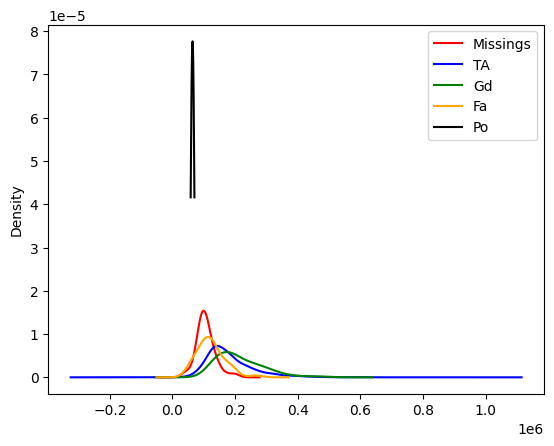

In [222]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="black", label="Po")

ax.legend()
plt.show()

Se realiza la imputación con Fa ya que es la que mayor mayor se asemeja a Missing

In [223]:
dataHP['BsmtCond'].fillna('Fa', inplace=True) #imputación de variable categórica

#### Se realiza la imputación con la variable 'BsmtExposure'

In [224]:
dataset_cat_missing['BsmtCond'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

Visualización de la variable

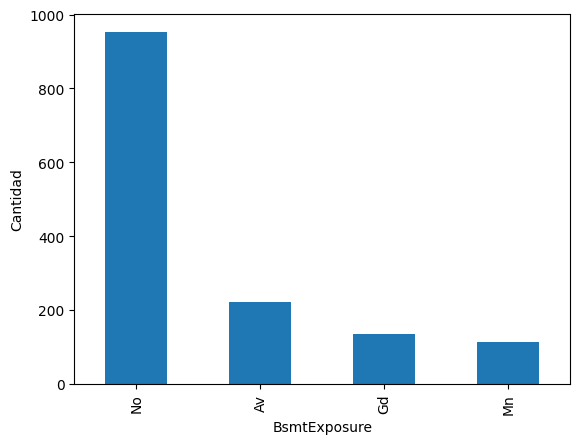

In [225]:
dataset_cat_missing['BsmtExposure'].value_counts().plot.bar()
plt.xlabel('BsmtExposure')
plt.ylabel('Cantidad')
plt.show()

Otra Visualización

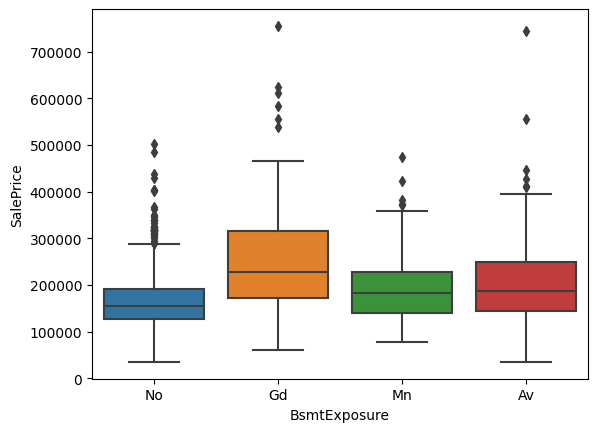

In [226]:
sns.boxplot(x=dataset_cat_missing['BsmtExposure'], y=dataset_cat_missing['SalePrice'])
plt.show()

Se comparan las distribuciones

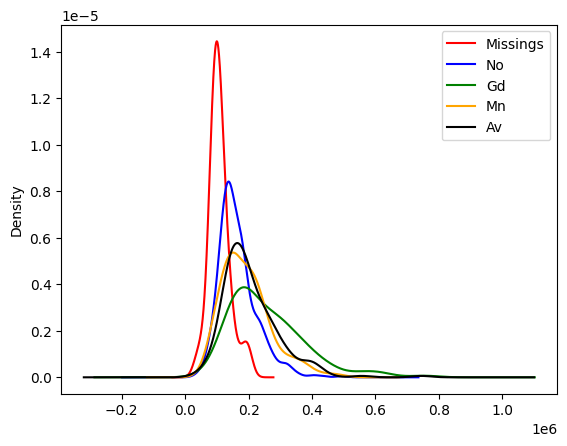

In [227]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtExposure'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'No']['SalePrice'].plot(kind="kde", color="blue", label="No")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Mn']['SalePrice'].plot(kind="kde", color="orange", label="Mn")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Av']['SalePrice'].plot(kind="kde", color="black", label="Av")

ax.legend()
plt.show()

Se realiza la imputación con No ya que es la que mayor mayor se asemeja a Missing

In [228]:
dataHP['BsmtExposure'].fillna('No', inplace=True) #imputación de variable categórica

#### Se procede a crear un nuevo dataset y validar que no tenga NaN

In [229]:
#Este dataset tiene columnas imputadas para sustituir los registros que sean NaN o Null
df=dataHP[cols_no_nan]

dataset=[col for col in df.columns if (df[col].isnull().mean()>0)]
len(dataset)


0

## Codificación de variables categóricas

In [230]:
def getCategoryVars(dataset):
    cat_colnames=[]
    colnames=dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

In [231]:
cat_cols=getCategoryVars(df)
print(cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


Se procede a realizar One hot encoding

In [232]:
# Se toma de las columnas como máximo 3 categorías diferentes para hacer el One Hot Encoding
one_hot_encoding=[]

for i in cat_cols:
    if len(df.groupby(i).count())<=3:
        print("")
        print(df[i].value_counts().sort_values(ascending=False))
        one_hot_encoding.append(i)
print(f"Las variables para One Hot Encoding son: {one_hot_encoding}")


Pave    1454
Grvl       6
Name: Street, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Y    1365
N      95
Name: CentralAir, dtype: int64

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
Las variables para One Hot Encoding son: ['Street', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive']


In [233]:
dfTemp=pd.get_dummies(df[one_hot_encoding])
dfTemp

,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0,1,1,0,1,0,0,0,1,0,0,1
1,0,1,1,0,1,0,0,0,1,0,0,1
2,0,1,1,0,1,0,0,0,1,0,0,1
3,0,1,1,0,1,0,0,0,1,0,0,1
4,0,1,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,1,0,1,0,0,0,1,0,0,1
1456,0,1,1,0,1,0,0,0,1,0,0,1
1457,0,1,1,0,1,0,0,0,1,0,0,1
1458,0,1,1,0,1,0,0,0,1,0,0,1


In [234]:
#Se unen las columnas
df=pd.concat([df,dfTemp], axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Utilities_AllPub,Utilities_NoSeWa,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1,0,1,0,0,0,1,0,0,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,0,1,0,0,0,1,0,0,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,1,0,0,0,1,0,0,1


In [235]:
# Se obtienen las variables para realizar Frecuency encoding a aquellas que poseen mas de 3 categorías

freq_encoding=[]

for i in cat_cols:
    if len(df.groupby(i).count())>3:
        print("")
        print(df[i].value_counts().sort_values(ascending=False))
        freq_encoding.append(i)
print(f"Las variables para Frecuency Encoding son: {freq_encoding}")


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Norm      1445
Feedr        6
Artery       2
RR

#### Se crean el diccionarios

In [236]:
# Se crean los diccionarios con las frecuencias de cada variable para realizar el frecuency encoding

MSZoning_freq_mapper=(df['MSZoning'].value_counts().sort_values(ascending=False)).to_dict()
LotShape_freq_mapper=(df['LotShape'].value_counts().sort_values(ascending=False)).to_dict()
LandContour_freq_mapper=(df['LandContour'].value_counts().sort_values(ascending=False)).to_dict()
LotConfig_freq_mapper=(df['LotConfig'].value_counts().sort_values(ascending=False)).to_dict()
Neighborhood_freq_mapper=(df['Neighborhood'].value_counts().sort_values(ascending=False)).to_dict()
Condition1_freq_mapper=(df['Condition1'].value_counts().sort_values(ascending=False)).to_dict()
Condition2_freq_mapper=(df['Condition2'].value_counts().sort_values(ascending=False)).to_dict()
BldgType_freq_mapper=(df['BldgType'].value_counts().sort_values(ascending=False)).to_dict()
HouseStyle_freq_mapper=(df['HouseStyle'].value_counts().sort_values(ascending=False)).to_dict()
RoofStyle_freq_mapper=(df['RoofStyle'].value_counts().sort_values(ascending=False)).to_dict()
RoofMatl_freq_mapper=(df['RoofMatl'].value_counts().sort_values(ascending=False)).to_dict()
Exterior1st_freq_mapper=(df['Exterior1st'].value_counts().sort_values(ascending=False)).to_dict()
Exterior2nd_freq_mapper=(df['Exterior2nd'].value_counts().sort_values(ascending=False)).to_dict()
MasVnrType_freq_mapper=(df['MasVnrType'].value_counts().sort_values(ascending=False)).to_dict()
ExterQual_freq_mapper=(df['ExterQual'].value_counts().sort_values(ascending=False)).to_dict()
ExterCond_freq_mapper=(df['ExterCond'].value_counts().sort_values(ascending=False)).to_dict()
Foundation_freq_mapper=(df['Foundation'].value_counts().sort_values(ascending=False)).to_dict()
BsmtQual_freq_mapper=(df['BsmtQual'].value_counts().sort_values(ascending=False)).to_dict()
BsmtCond_freq_mapper=(df['BsmtCond'].value_counts().sort_values(ascending=False)).to_dict()
BsmtExposure_freq_mapper=(df['BsmtExposure'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType1_freq_mapper=(df['BsmtFinType1'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType2_freq_mapper=(df['BsmtFinType2'].value_counts().sort_values(ascending=False)).to_dict()
Heating_freq_mapper=(df['Heating'].value_counts().sort_values(ascending=False)).to_dict()
HeatingQC_freq_mapper=(df['HeatingQC'].value_counts().sort_values(ascending=False)).to_dict()
Electrical_freq_mapper=(df['Electrical'].value_counts().sort_values(ascending=False)).to_dict()
KitchenQual_freq_mapper=(df['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
Functional_freq_mapper=(df['Functional'].value_counts().sort_values(ascending=False)).to_dict()
SaleType_freq_mapper=(df['SaleType'].value_counts().sort_values(ascending=False)).to_dict()
SaleCondition_freq_mapper=(df['SaleCondition'].value_counts().sort_values(ascending=False)).to_dict()

In [237]:
# Se mapean las frecuencias con el dataset

df['MSZoning_code']=df['MSZoning'].map(MSZoning_freq_mapper)
df['LotShape_code']=df['LotShape'].map(LotShape_freq_mapper)
df['LandContour_code']=df['LandContour'].map(LandContour_freq_mapper)
df['LotConfig_code']=df['LotConfig'].map(LotConfig_freq_mapper)
df['Neighborhood_code']=df['Neighborhood'].map(Neighborhood_freq_mapper)
df['Condition1_code']=df['Condition1'].map(Condition1_freq_mapper)
df['Condition2_code']=df['Condition2'].map(Condition2_freq_mapper)
df['BldgType_code']=df['BldgType'].map(BldgType_freq_mapper)
df['HouseStyle_code']=df['HouseStyle'].map(HouseStyle_freq_mapper)
df['RoofStyle_code']=df['RoofStyle'].map(RoofStyle_freq_mapper)
df['RoofMatl_code']=df['RoofMatl'].map(RoofMatl_freq_mapper)
df['Exterior1st_code']=df['Exterior1st'].map(Exterior1st_freq_mapper)
df['Exterior2nd_code']=df['Exterior2nd'].map(Exterior2nd_freq_mapper)
df['MasVnrType_code']=df['MasVnrType'].map(MasVnrType_freq_mapper)
df['ExterQual_code']=df['ExterQual'].map(ExterQual_freq_mapper)
df['ExterCond_code']=df['ExterCond'].map(ExterCond_freq_mapper)
df['Foundation_code']=df['Foundation'].map(Foundation_freq_mapper)
df['BsmtQual_code']=df['BsmtQual'].map(BsmtQual_freq_mapper)
df['BsmtCond_code']=df['BsmtCond'].map(BsmtCond_freq_mapper)
df['BsmtExposure_code']=df['BsmtExposure'].map(BsmtExposure_freq_mapper)
df['BsmtFinType1_code']=df['BsmtFinType1'].map(BsmtFinType1_freq_mapper)
df['BsmtFinType2_code']=df['BsmtFinType2'].map(BsmtFinType2_freq_mapper)
df['Heating_code']=df['Heating'].map(Heating_freq_mapper)
df['HeatingQC_code']=df['HeatingQC'].map(HeatingQC_freq_mapper)
df['Electrical_code']=df['Electrical'].map(Electrical_freq_mapper)
df['KitchenQual_code']=df['KitchenQual'].map(KitchenQual_freq_mapper)
df['Functional_code']=df['Functional'].map(Functional_freq_mapper)
df['SaleType_code']=df['SaleType'].map(SaleType_freq_mapper)
df['SaleCondition_code']=df['SaleCondition'].map(SaleCondition_freq_mapper)

Se depura el dataset para dejar columnas codificadas

In [238]:
#Se define la función para identificar las columnas y datos
def GetVarsNumeric(dataset):
    num_colsnames=[]
    columnas=dataset.columns

    for col in columnas:
        if((dataset[col].dtype=='int64') or (dataset[col].dtype=='float')) or (dataset[col].dtype=='uint8'):
            num_colsnames.append(col)
    return num_colsnames

In [239]:
num_cols=GetVarsNumeric(df)
print(num_cols)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'CentralAir_N', 'CentralAir_Y', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'MSZoning_code', 'LotShape_code', 'LandContour_code', 'LotConfig_code', 'Neighborhood_code', 'Condition1_code', 'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code', 'Foundation_

Se crea dataset nuevo con columnas codificadas

In [240]:
df_cod= df[num_cols]
df_cod

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Heating_code,HeatingQC_code,Electrical_code,KitchenQual_code,Functional_code,SaleType_code,SaleCondition_code
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,991,418,1256,1428,741,1335,586,1360,1267,1198
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,134,220,1256,1428,741,1335,735,1360,1267,1198
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,114,418,1256,1428,741,1335,586,1360,1267,1198
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,991,220,1256,1428,241,1335,586,1360,1267,101
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,221,418,1256,1428,741,1335,586,1360,1267,1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,991,430,1256,1428,741,1335,735,1360,1267,1198
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,991,220,54,1428,428,1335,735,31,1267,1198
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,991,418,1256,1428,741,1335,586,1360,1267,1198
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,114,418,54,1428,241,94,586,1360,1267,1198


### Outliers

In [242]:
def getColumnTypes(dataset):
    # Descripción: Esta función extrae el tipo de dominio de las columnas de un dataset.
    # Entradas: Pandas dataframe
    # Salida: Tupla con arreglo que contiene nombres de las columnas 

    # Se definen las variables receptoras de las clasificaciones.
    continuas= []
    discretas= []
    
    for col in dataset.columns:
        if((dataset[col].dtype =='int64') or (dataset[col].dtype == 'float64')):
            if(len(dataset[col].unique()) > 30):
                continuas.append(col)
            else:
                discretas.append(col)
    continuas.remove('Id') ## Se elimina la columna Id de las colínuas ya que es identificador
    continuas.remove('SalePrice') ## Se elimina la columna SalePrice debido a que es la variable dependiente

    return continuas, discretas

Se procede a obtener las variables contínuas y discretas

In [243]:
continuas, discretas = getColumnTypes(df_cod)
#Se imprimen los resultados
print(f"Se tiene un total de {len(continuas)} variables contínuas las cuales son:")
print(continuas)
print(f"Se tiene un total de {len(discretas)} variables discretas las cuales son:")
print(discretas)

Se tiene un total de 16 variables contínuas las cuales son:
['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']
Se tiene un total de 47 variables discretas las cuales son:
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_code', 'LotShape_code', 'LandContour_code', 'LotConfig_code', 'Neighborhood_code', 'Condition1_code', 'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code', 'Foundation_code', 'BsmtQual_code', 'BsmtCond_code', 'BsmtExposure_code', 'BsmtFinType1_code', 'BsmtFinType2_co

Se define la función para graficar y comparar las variables a analizar

In [250]:
def plotDistBoxQQ (dataset):
    """ 
     Descripción: Muestra las gráficas de Distribución, Boxplot y Q-Qplot para detectar Outliers
     Input: dataset-> Pandas dataframe, col-> string con nombre de la columna
     Output: visualización de plots. 
       """
    for col in dataset:
      plt.figure(figsize=(20,6))
      plt.subplot(1,3,1)
      sns.distplot(df_cod[col], bins=30)
      plt.title("Histograma y densidad")

      plt.subplot(1,3,2)
      sns.boxplot(y=df_cod[col])
      plt.title("Boxplot")

      plt.subplot(1,3,3)
      stats.probplot(df_cod[col], dist="norm", plot=plt)
      plt.title("Q-Q Plot")

Se llama a graficar

C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_16116\2957845739.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cod[col], bins=30)
C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_16116\2957845739.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cod[col], bins=30)
C:\Users\lguti

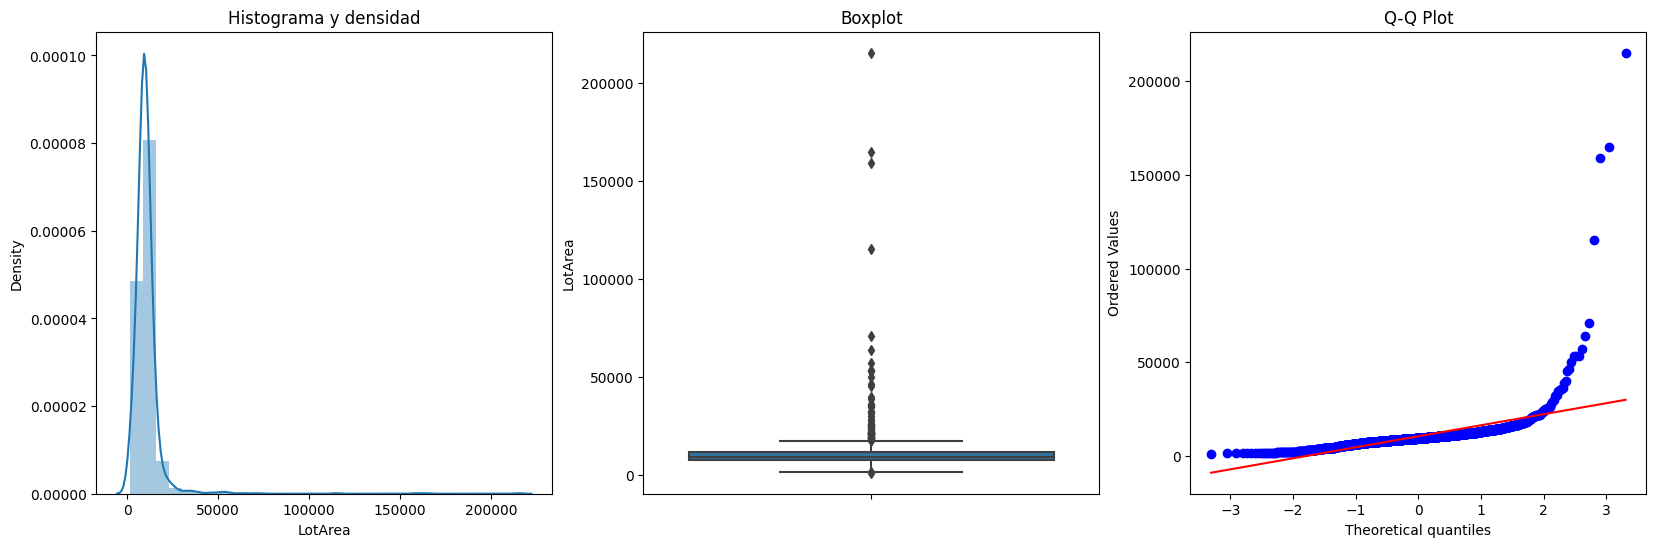

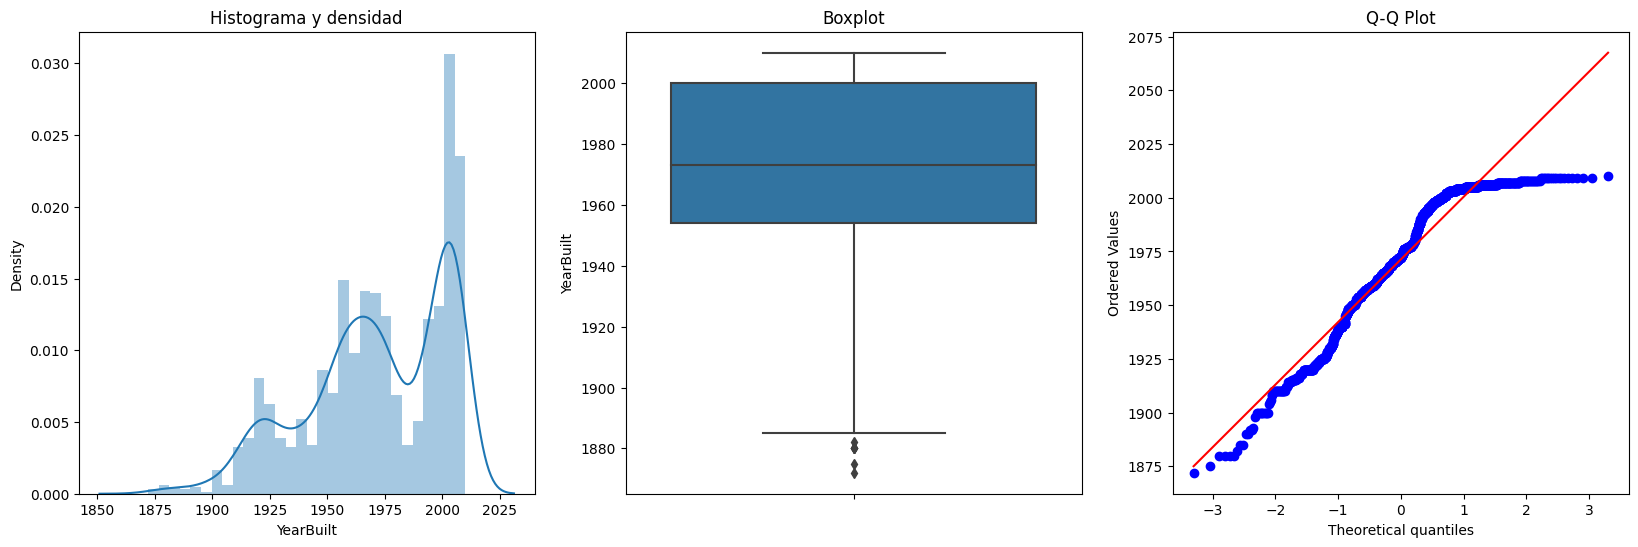

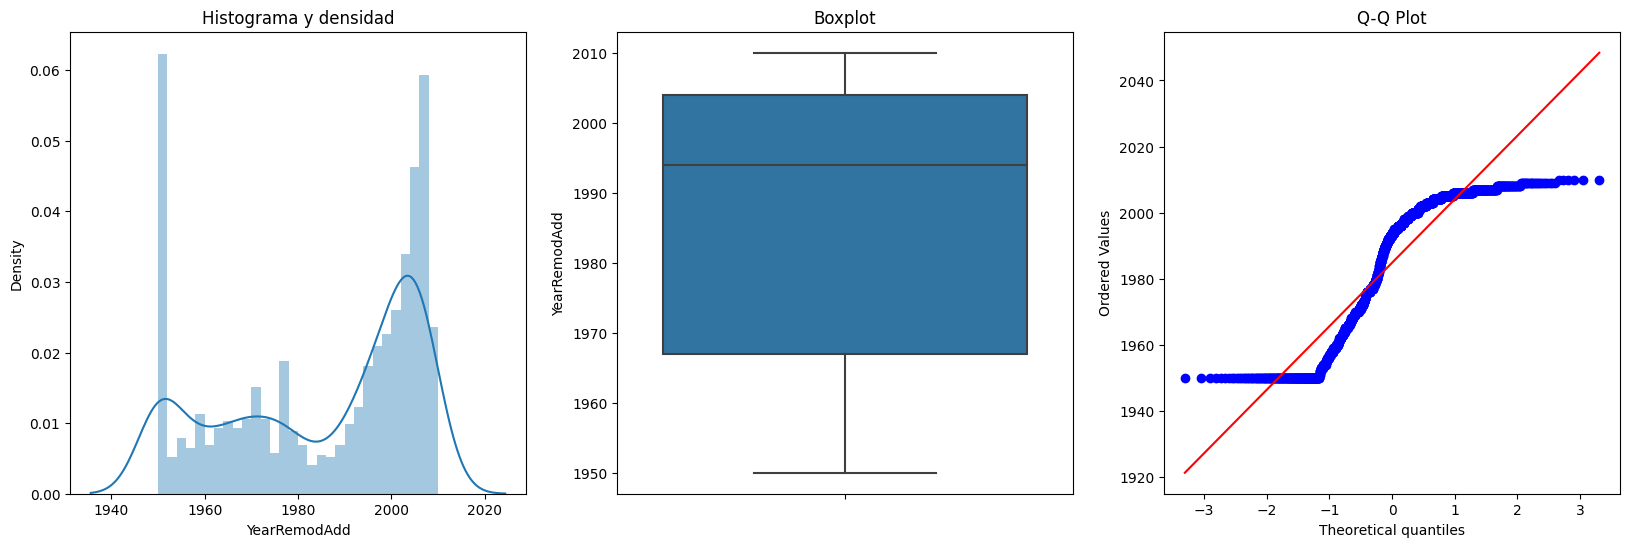

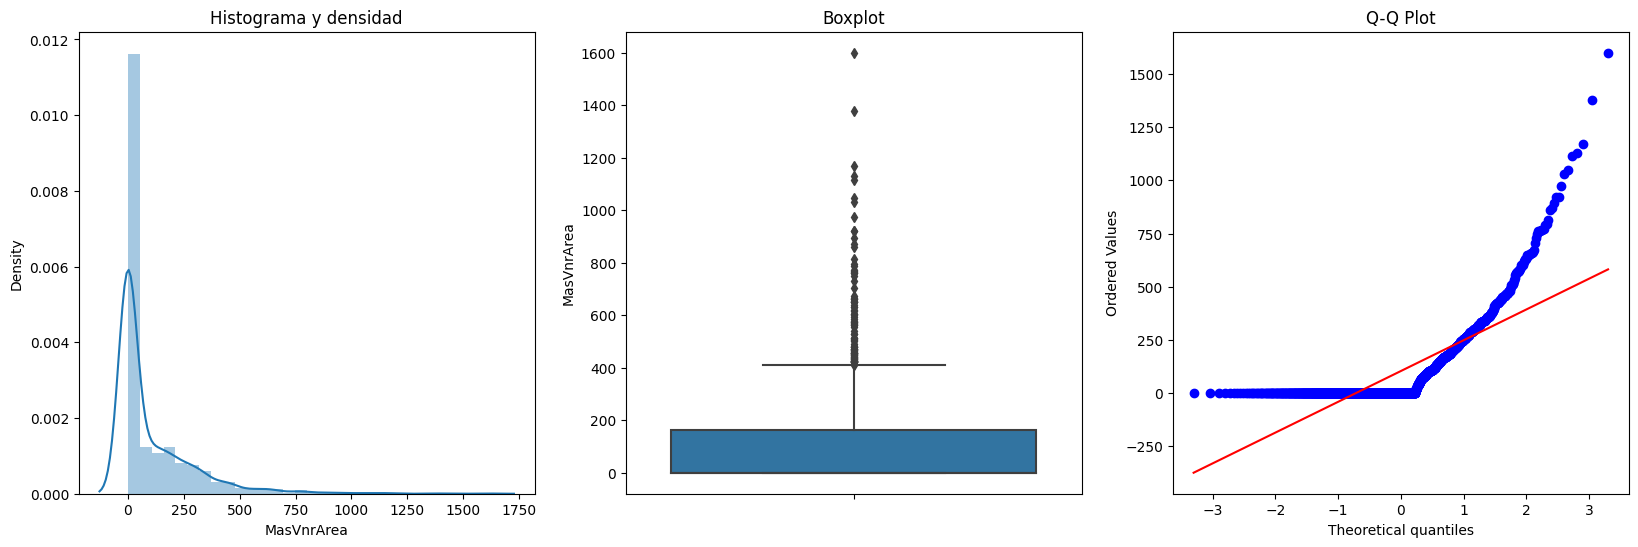

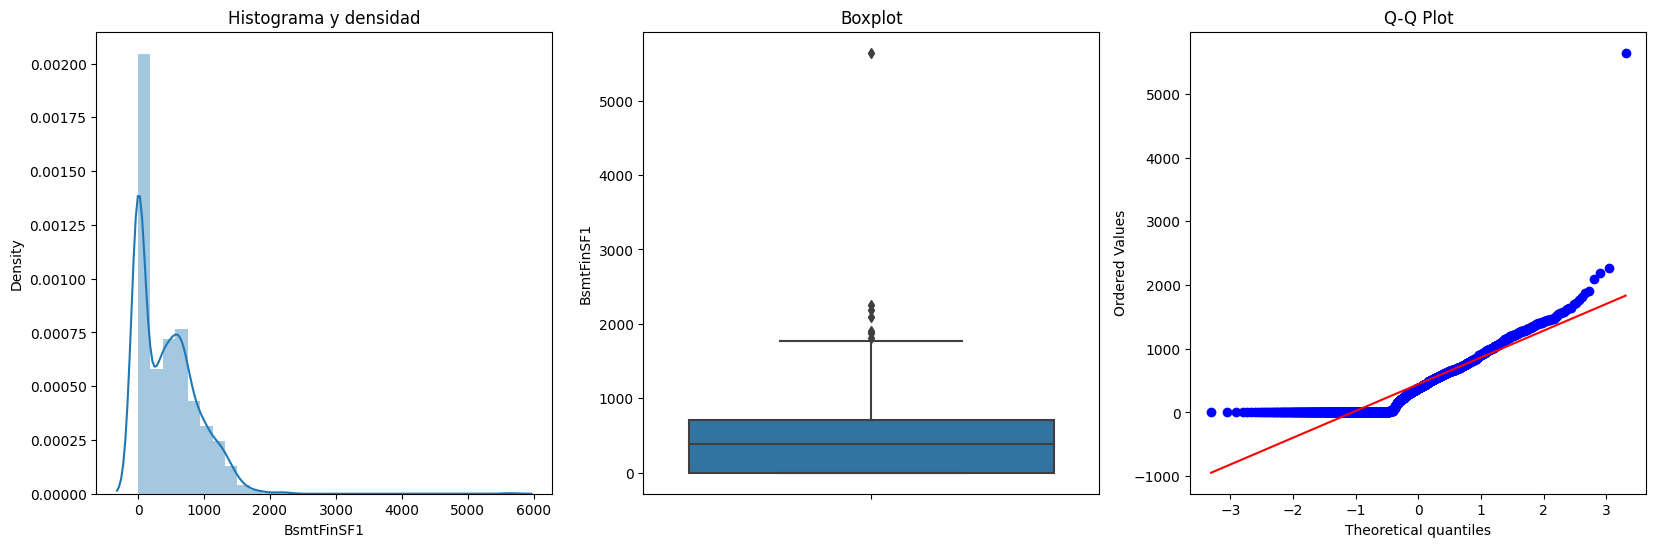

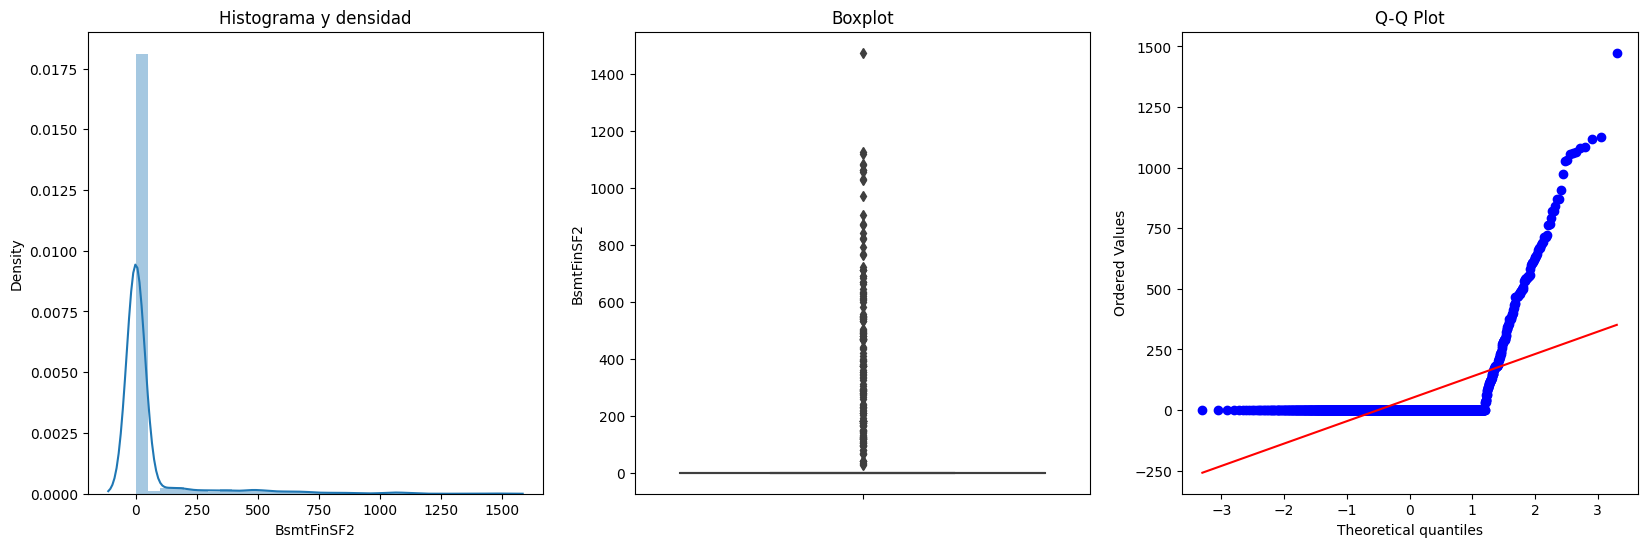

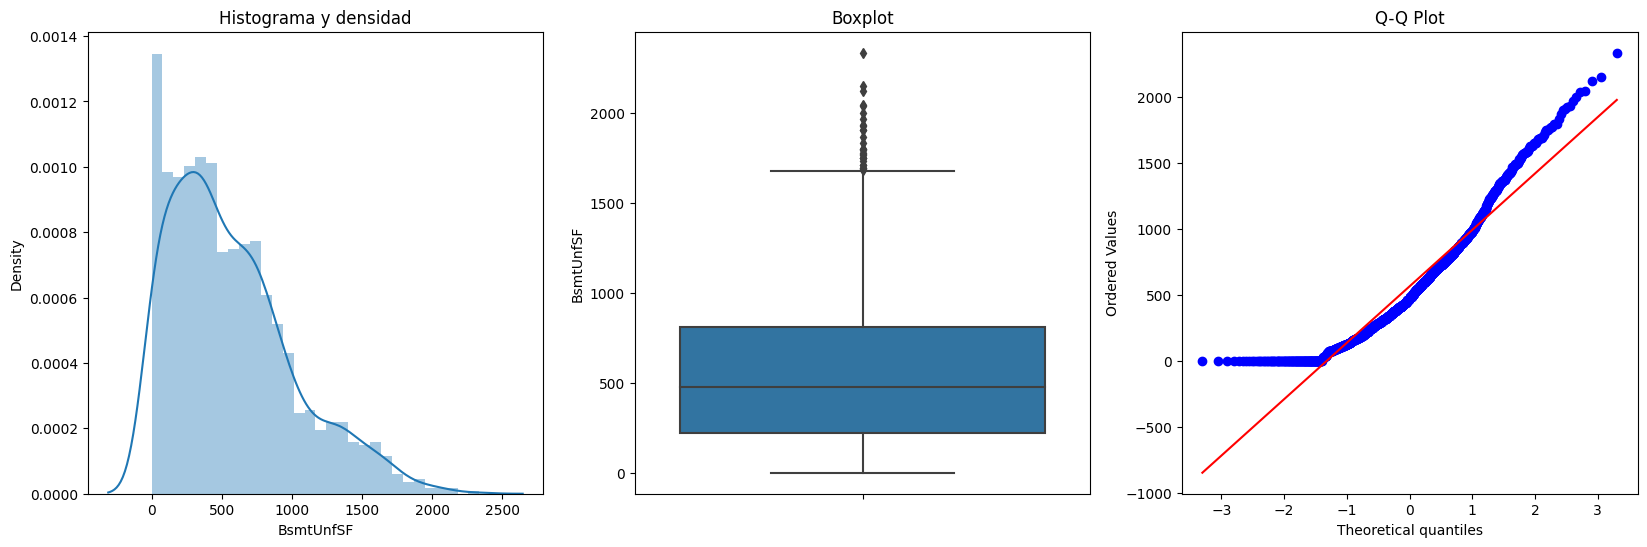

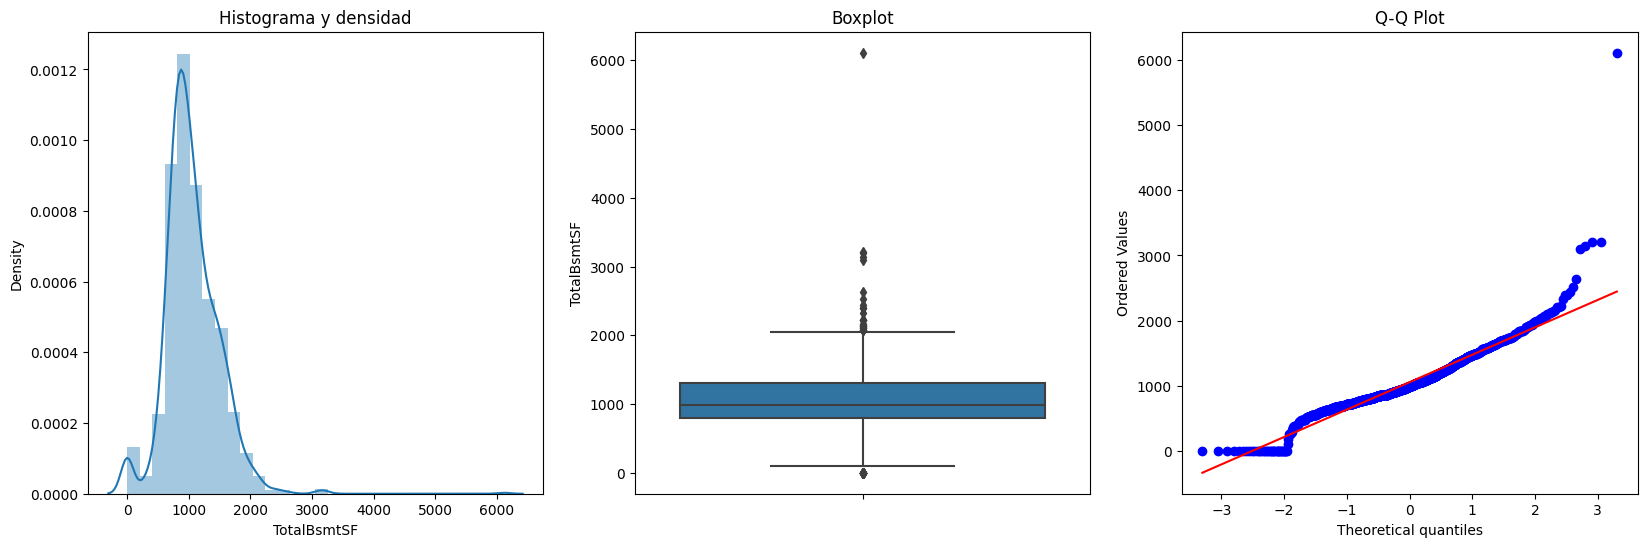

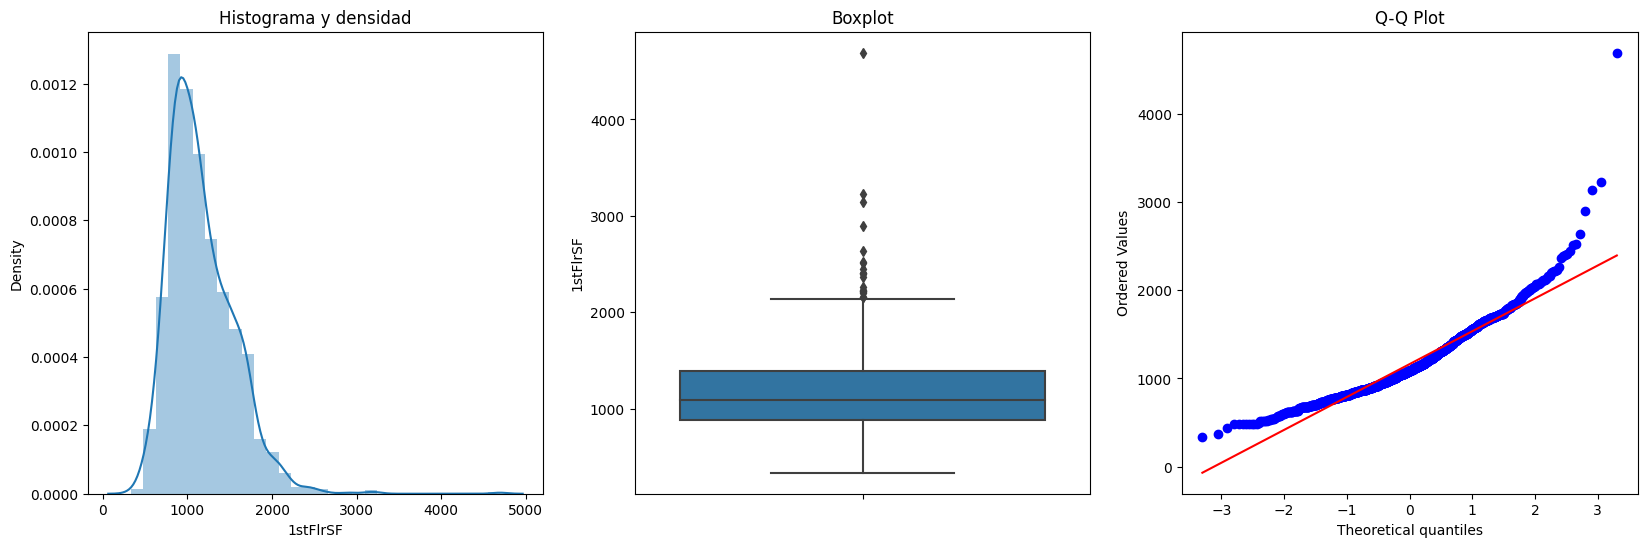

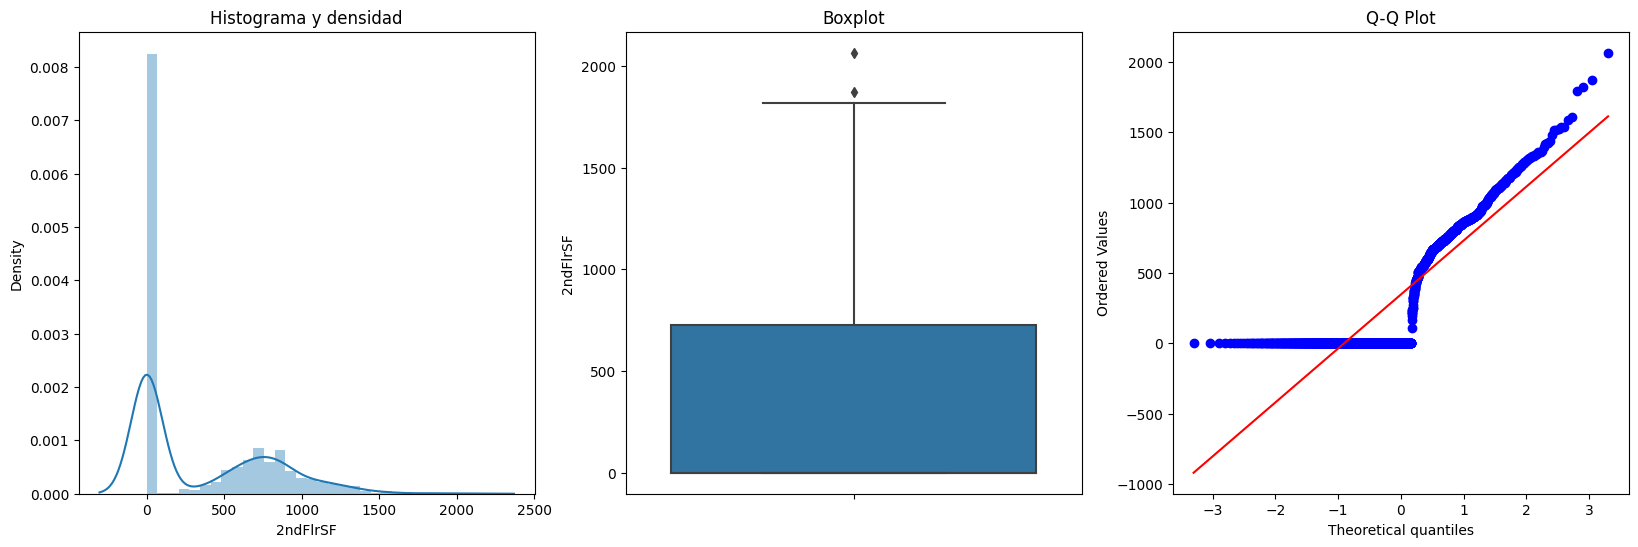

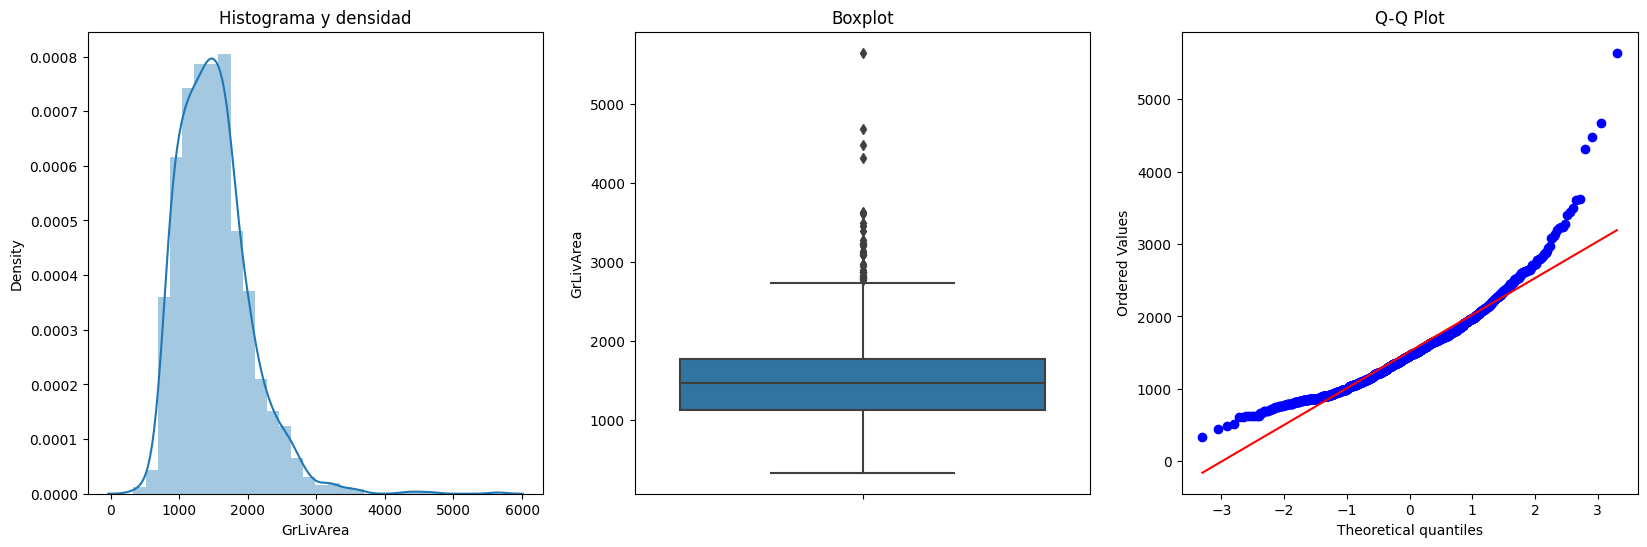

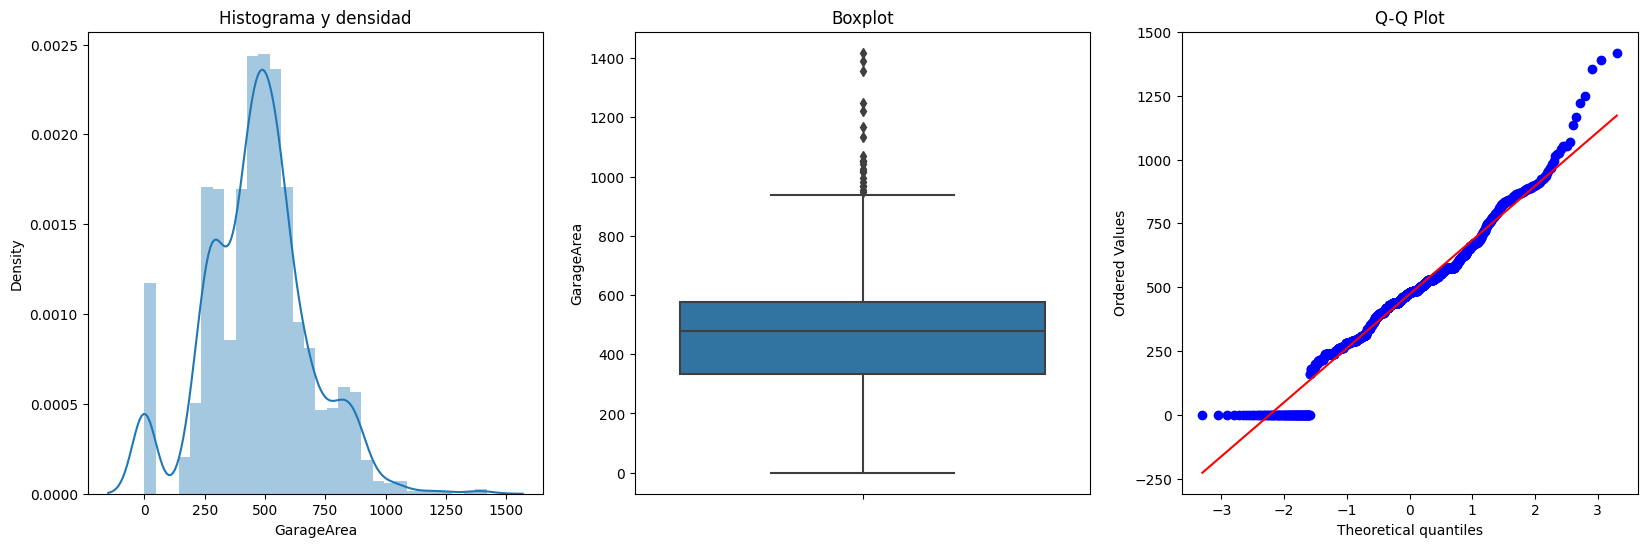

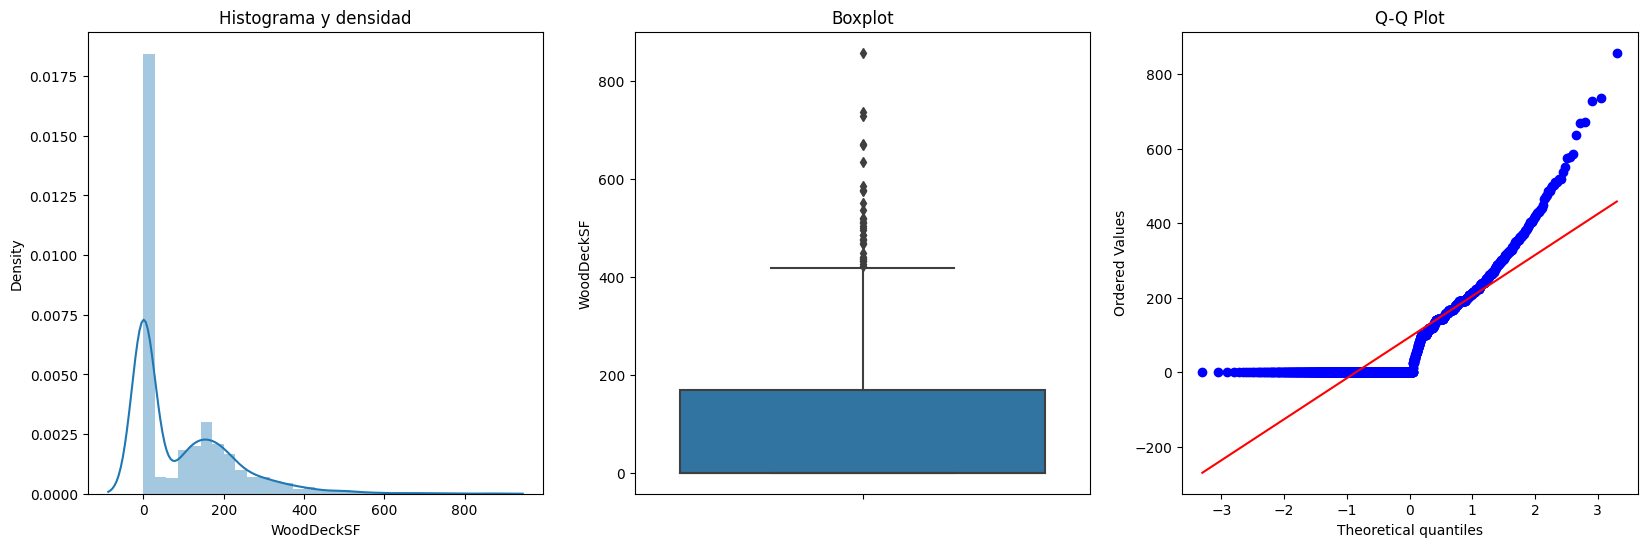

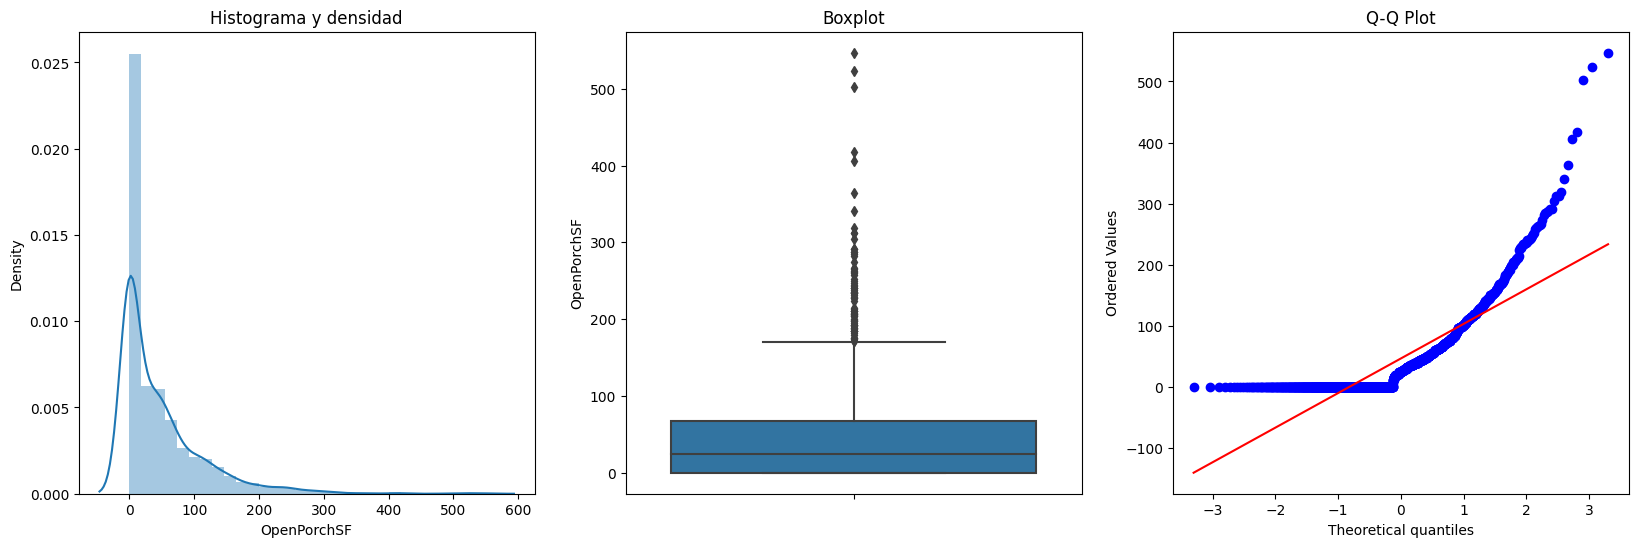

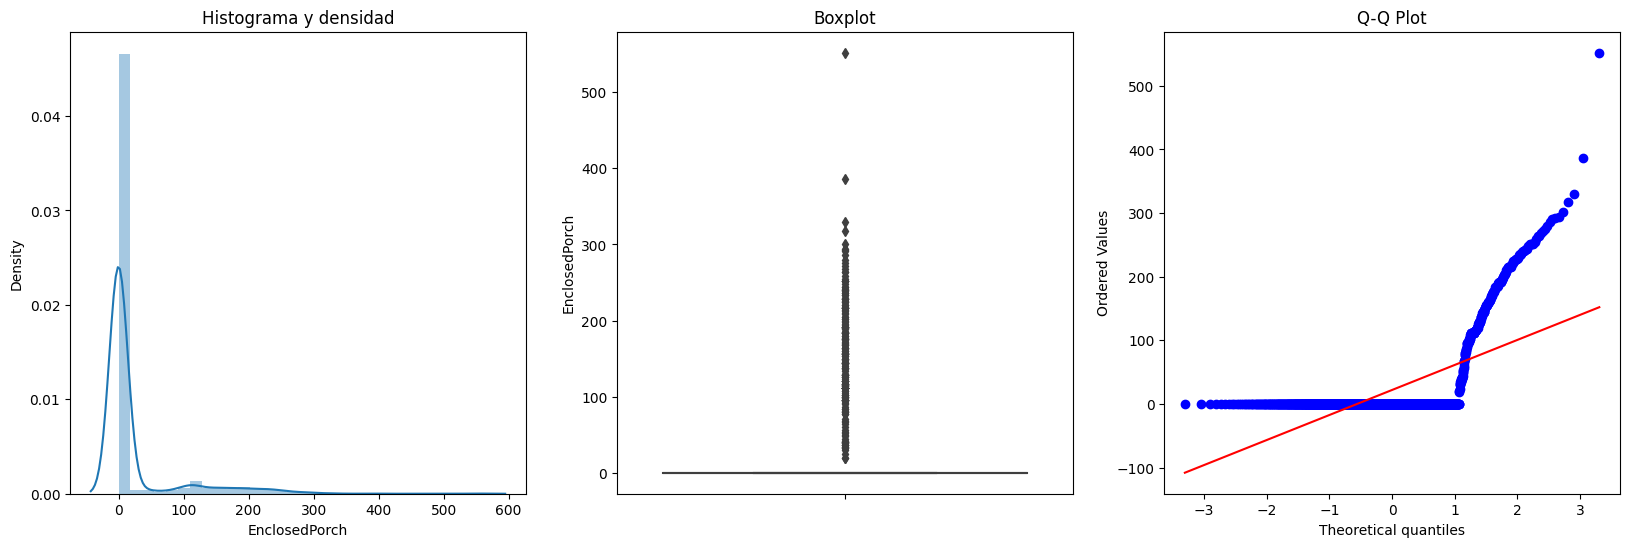

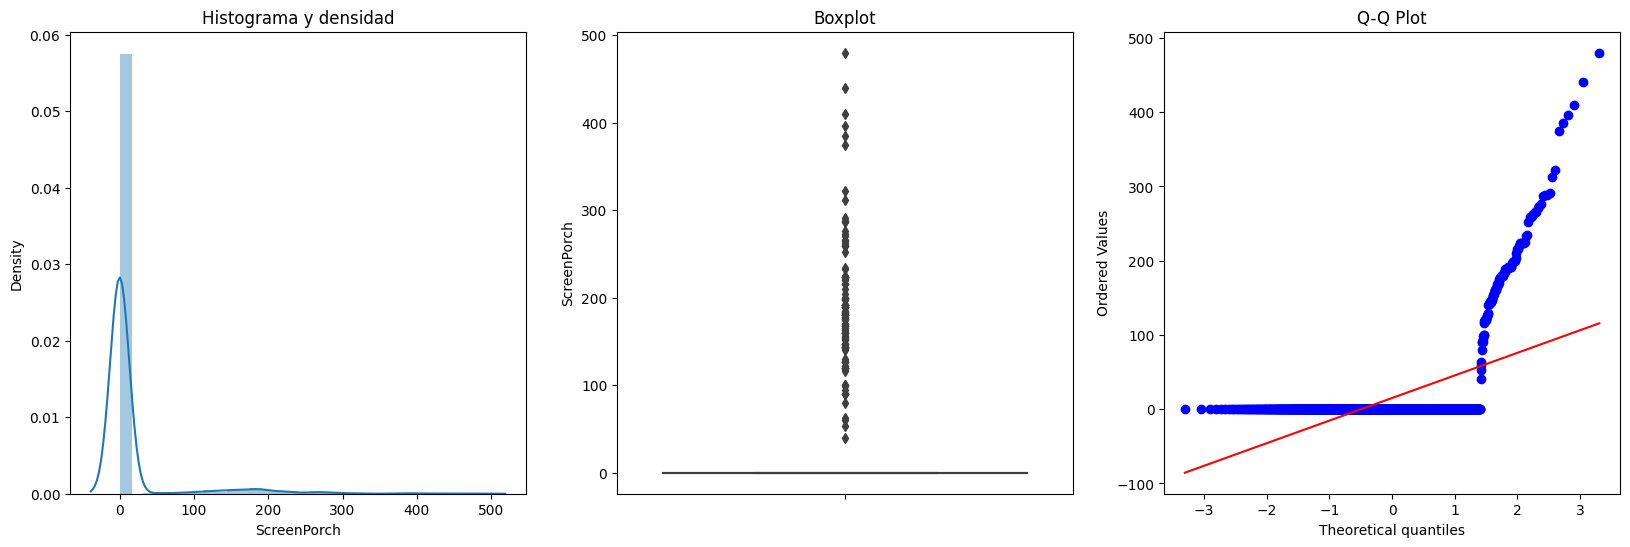

In [251]:
plotDistBoxQQ(continuas)

Se procede a realizar el Capping

In [255]:
# Se detectan los valores de IQR, LI y LS para las columnas donde existan Outliers.
def detectOutlierLimits(dataset):
    """ Descripción: Calcula los límites superiores e inferiores para la detección de Outliers.
     Input: dataset-> pandas, dataframe, col->string nombre de la columna
     Output: tupla de floats con los límites superior e inferior"""
    for col in continuas:
        IQR=df_cod[col].quantile(0.75)-df_cod[col].quantile(0.25) #Se detecta el rango intercuartílico Q3-Q1
        LI=df_cod[col].quantile(0.25)-(IQR*1.75) #Se establece el límite inferior LI
        LS=df_cod[col].quantile(0.75)+(IQR*1.75) #Se establece el límite superior LS
        if LI<0: # Se valida que sean números iguales o mayores que cero.
            LI=0
        df_cod[col]=np.where(df_cod[col]>LS,LS,
                                        np.where(df_cod[col]<LI ,LI,df_cod[col])) ## Reemplazo de outliers por valores LI y LS


Se llama la función a detectar y reemplazar los outliers

In [256]:
detectOutlierLimits(continuas)

C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_16116\414420934.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cod[col]=np.where(df_cod[col]>LS,LS,
C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_16116\414420934.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cod[col]=np.where(df_cod[col]>LS,LS,
C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_16116\414420934.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Se validan los reemplazos de los outliers en la función

C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_16116\2957845739.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cod[col], bins=30)
C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_16116\2957845739.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cod[col], bins=30)
C:\Users\lguti

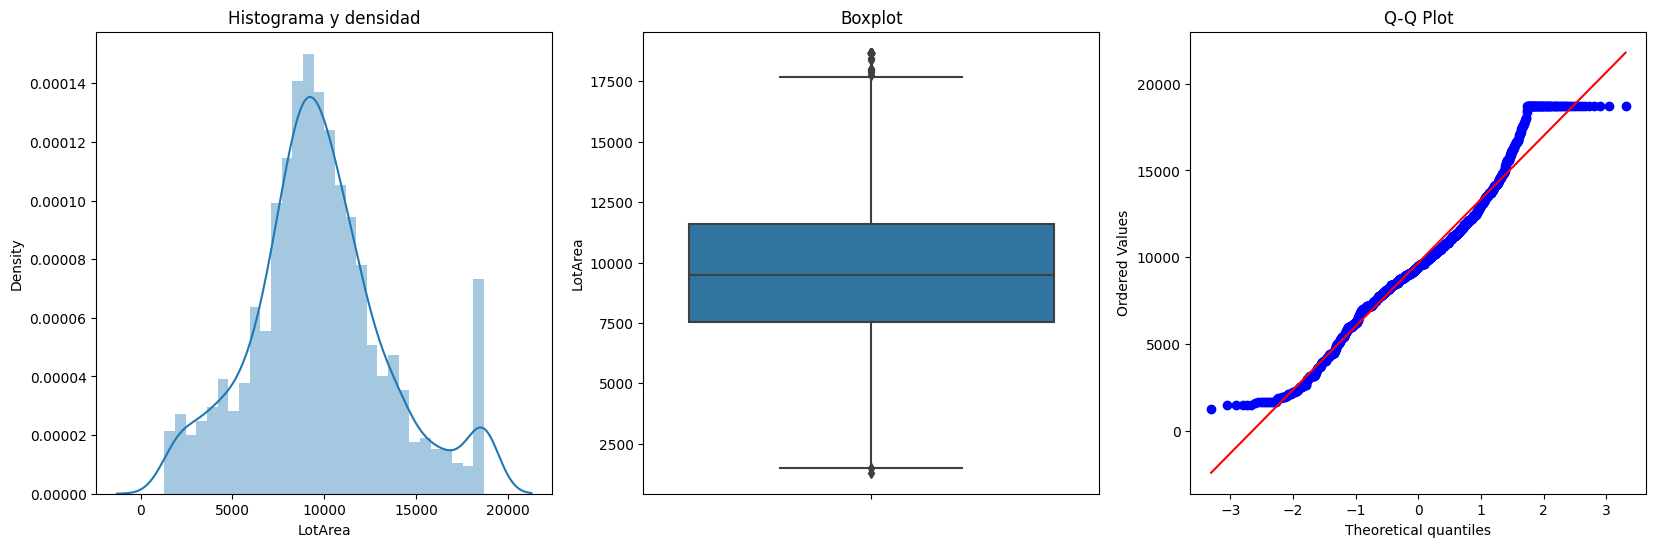

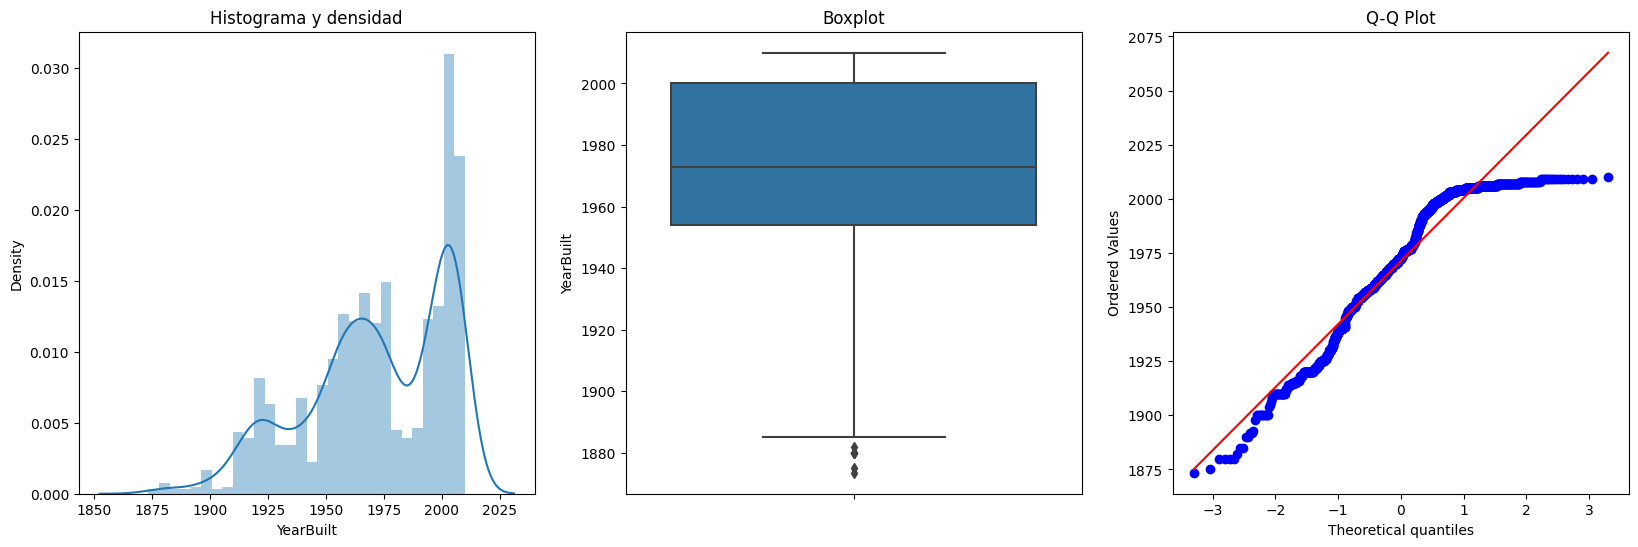

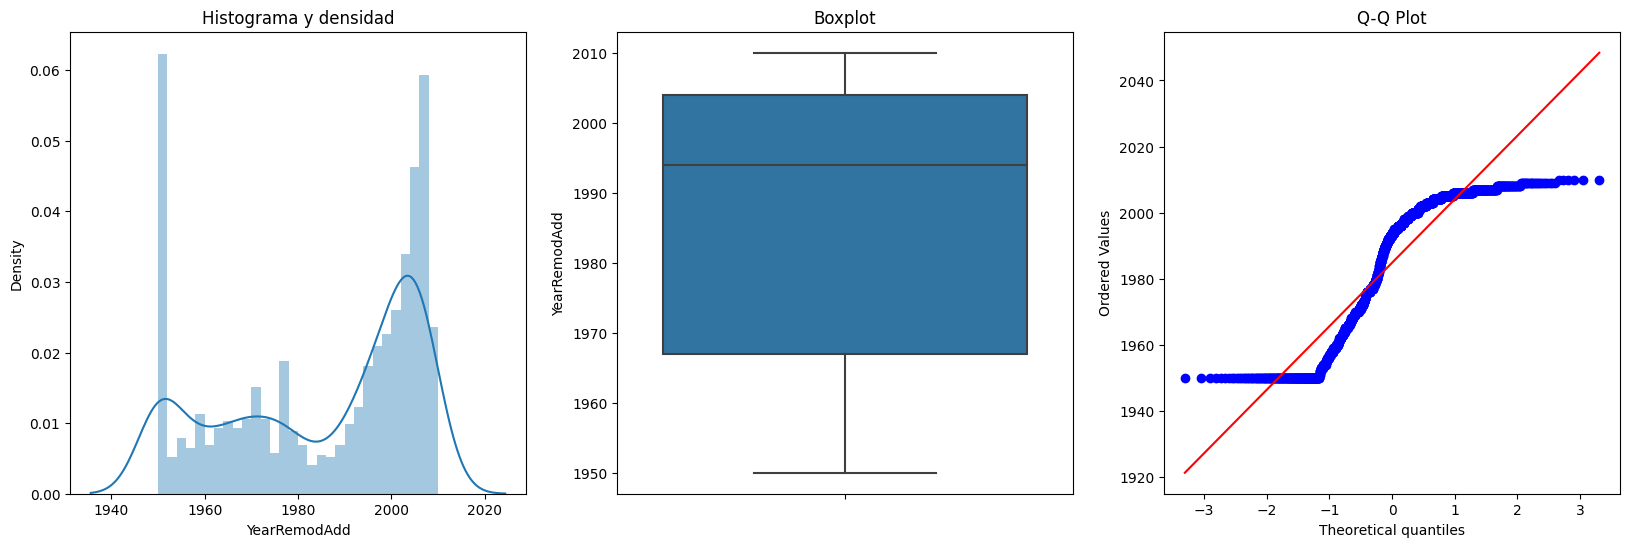

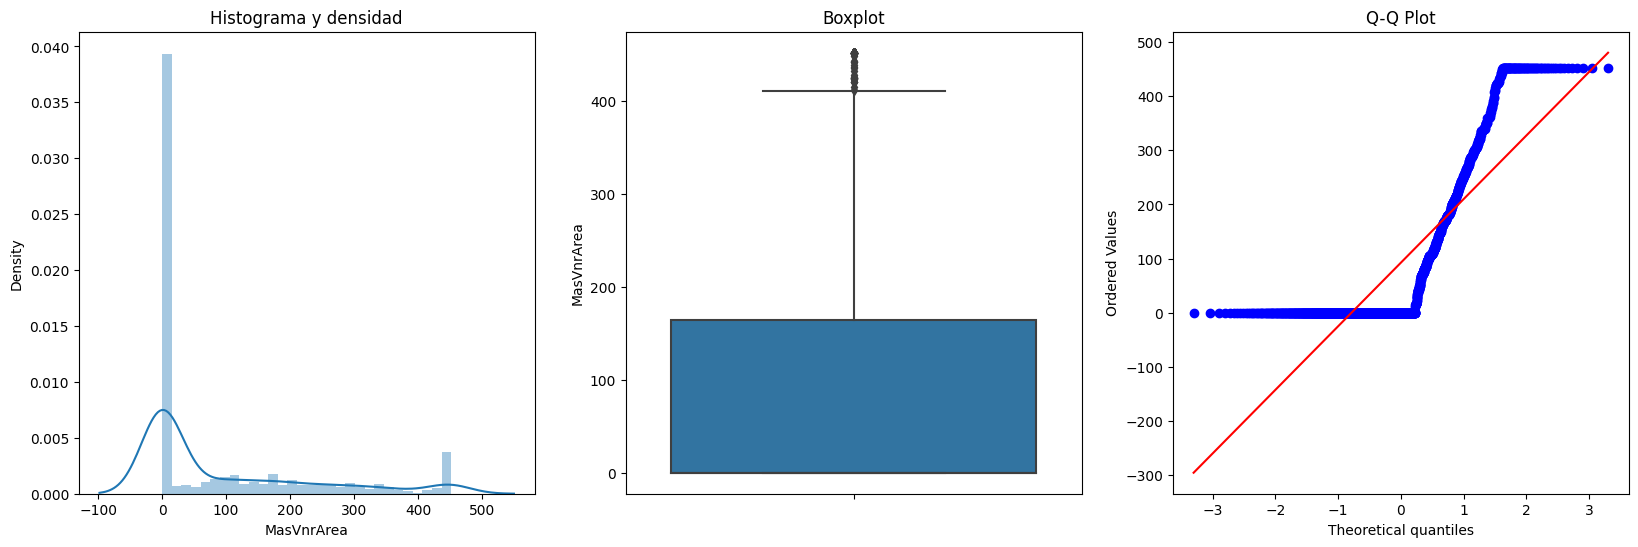

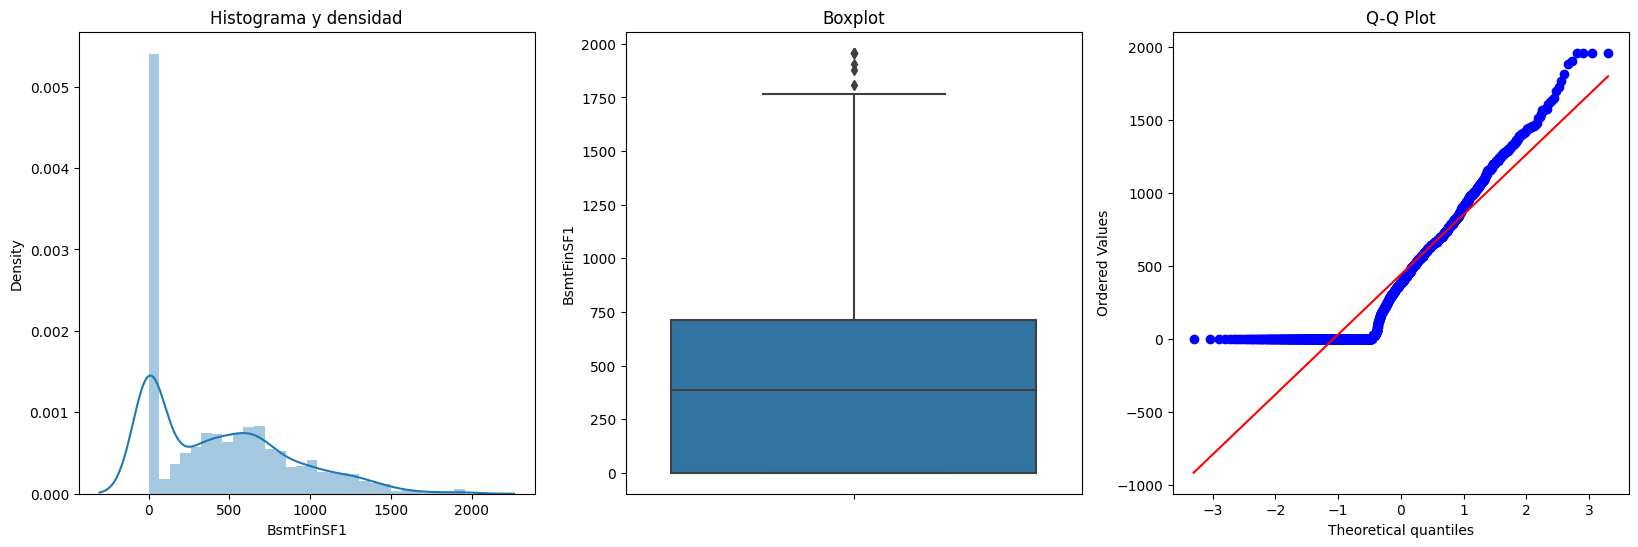

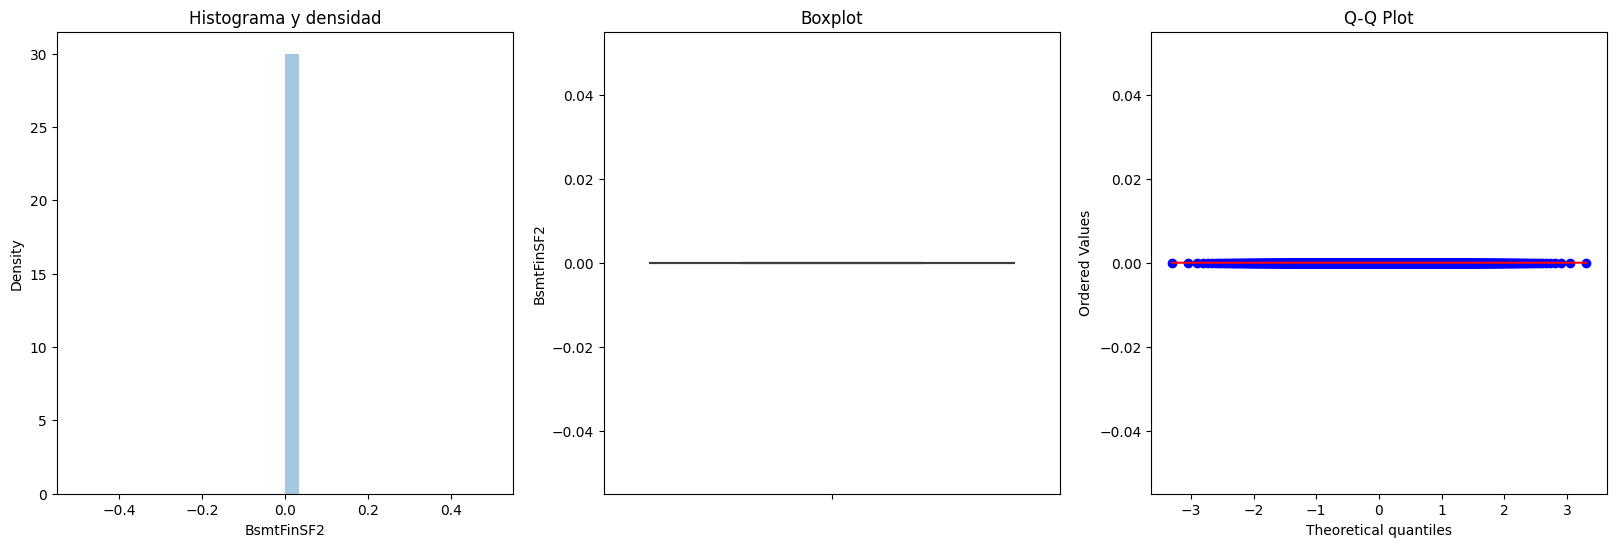

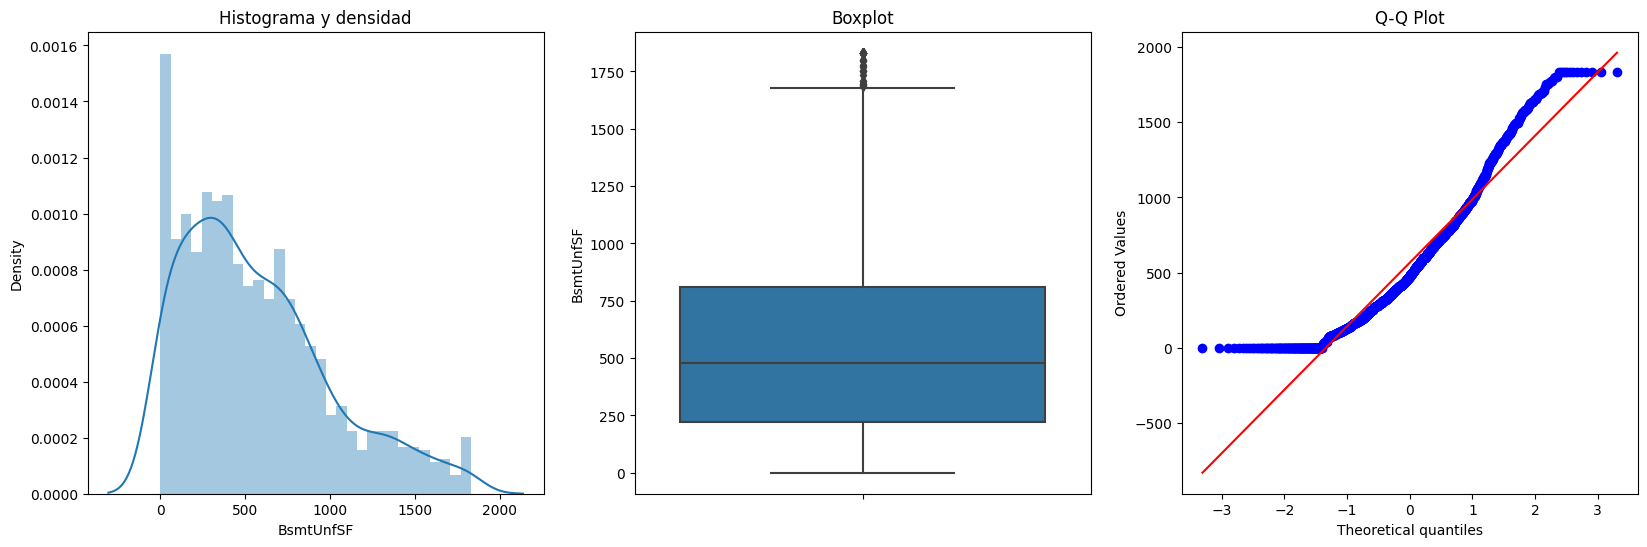

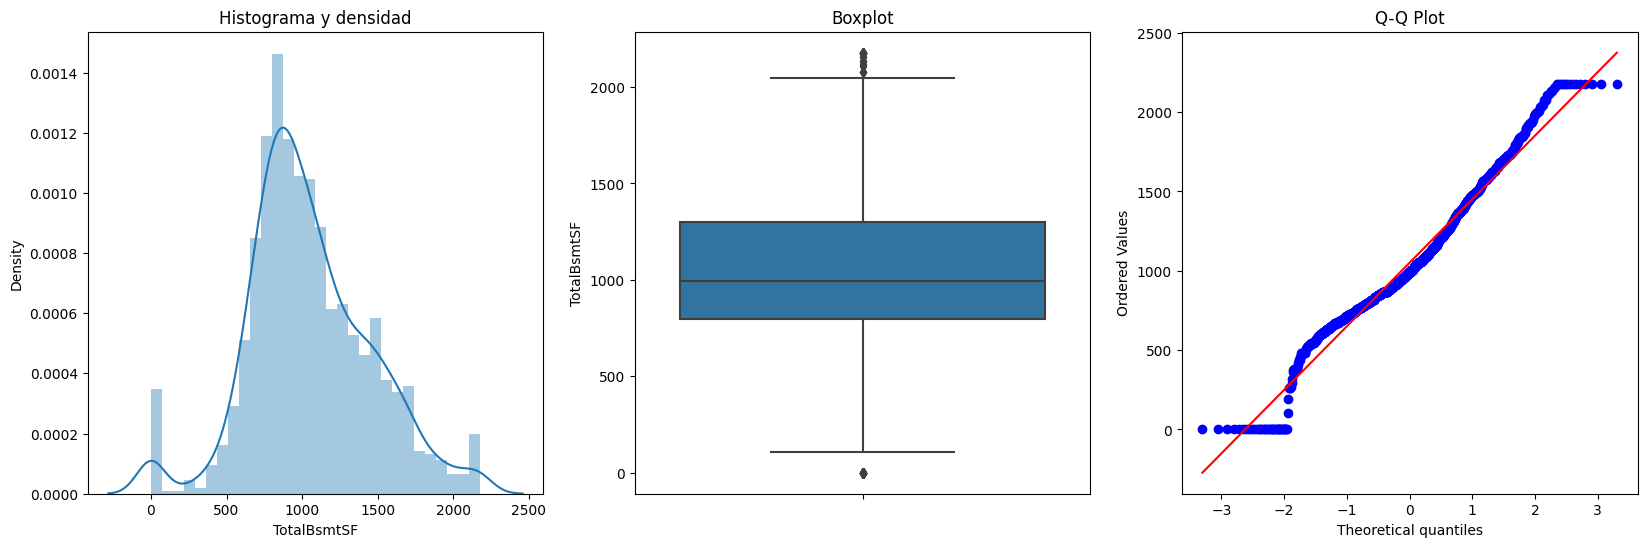

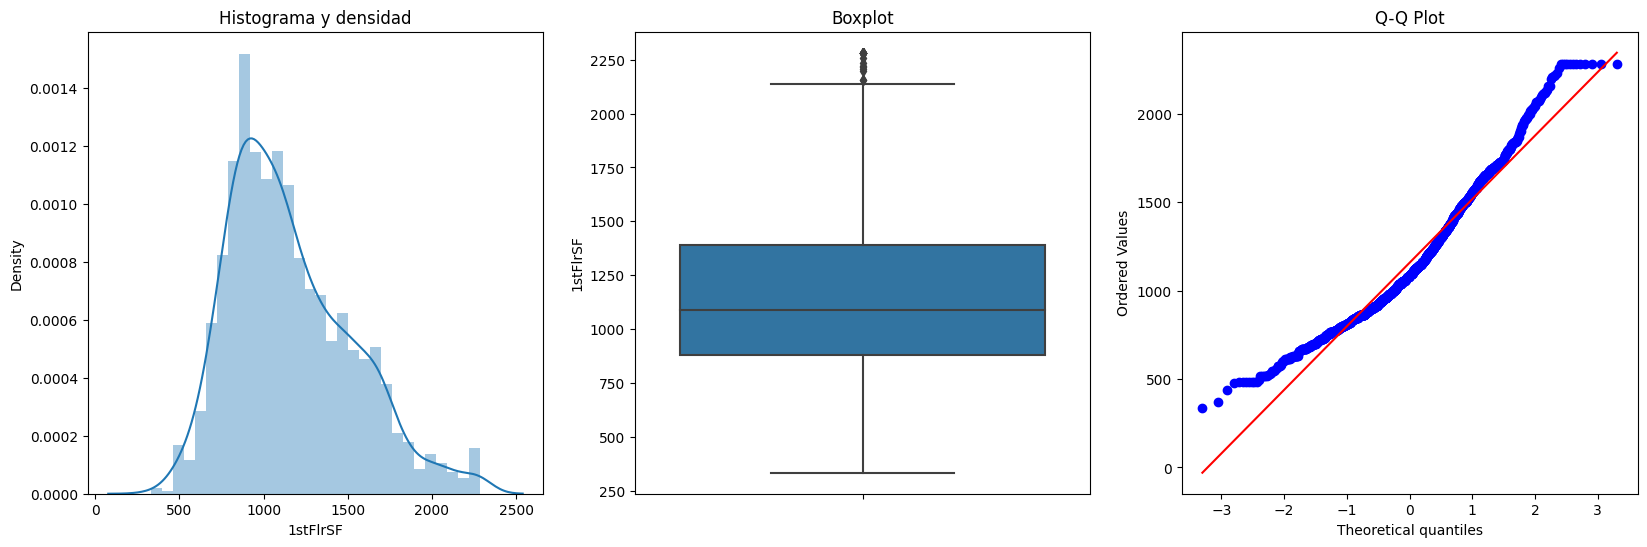

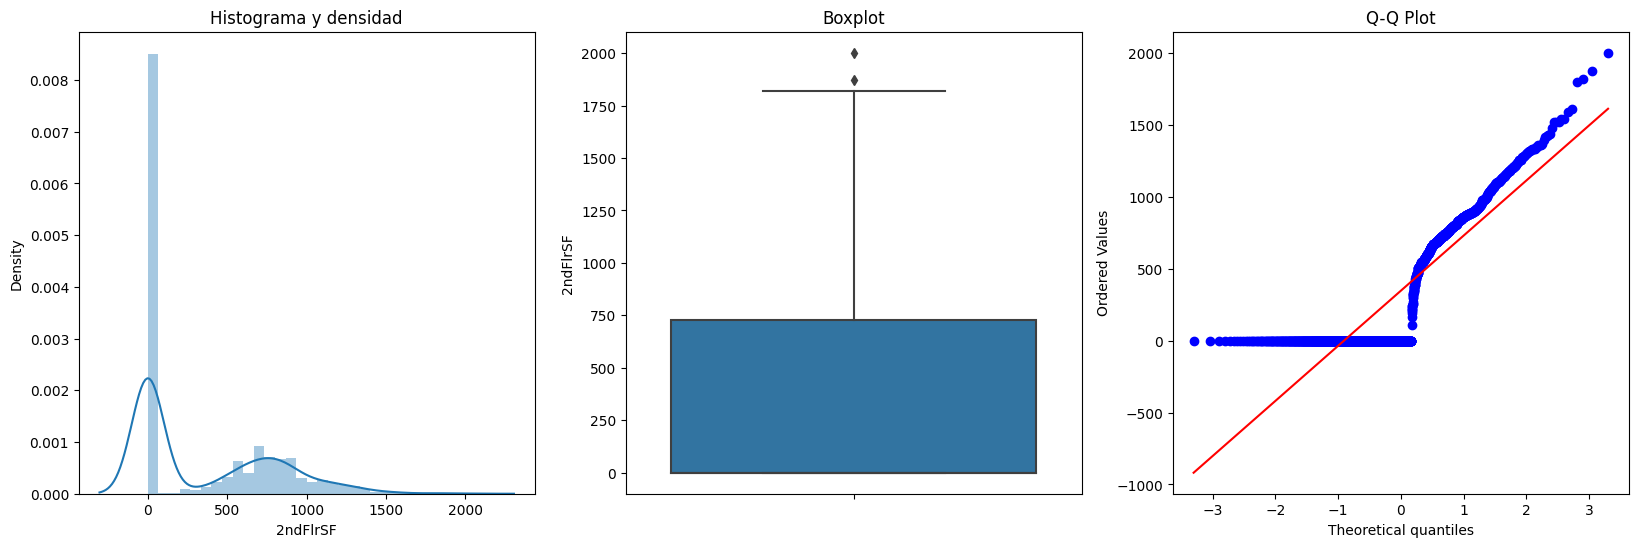

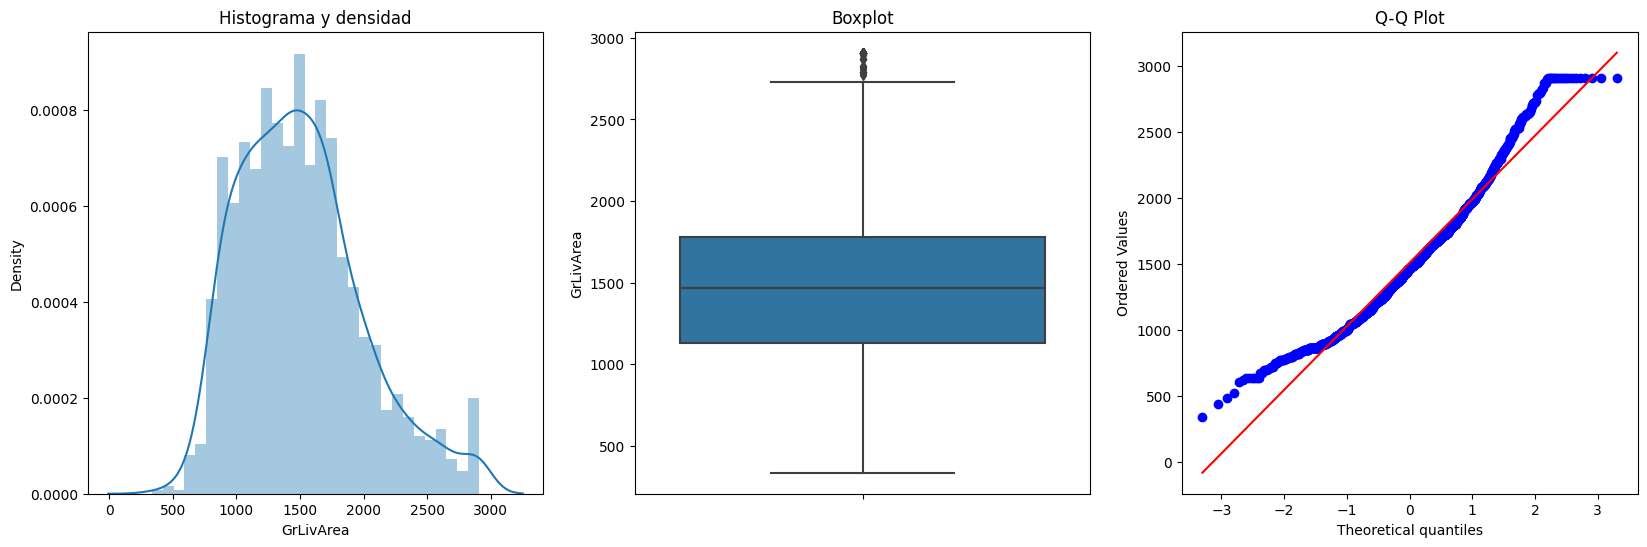

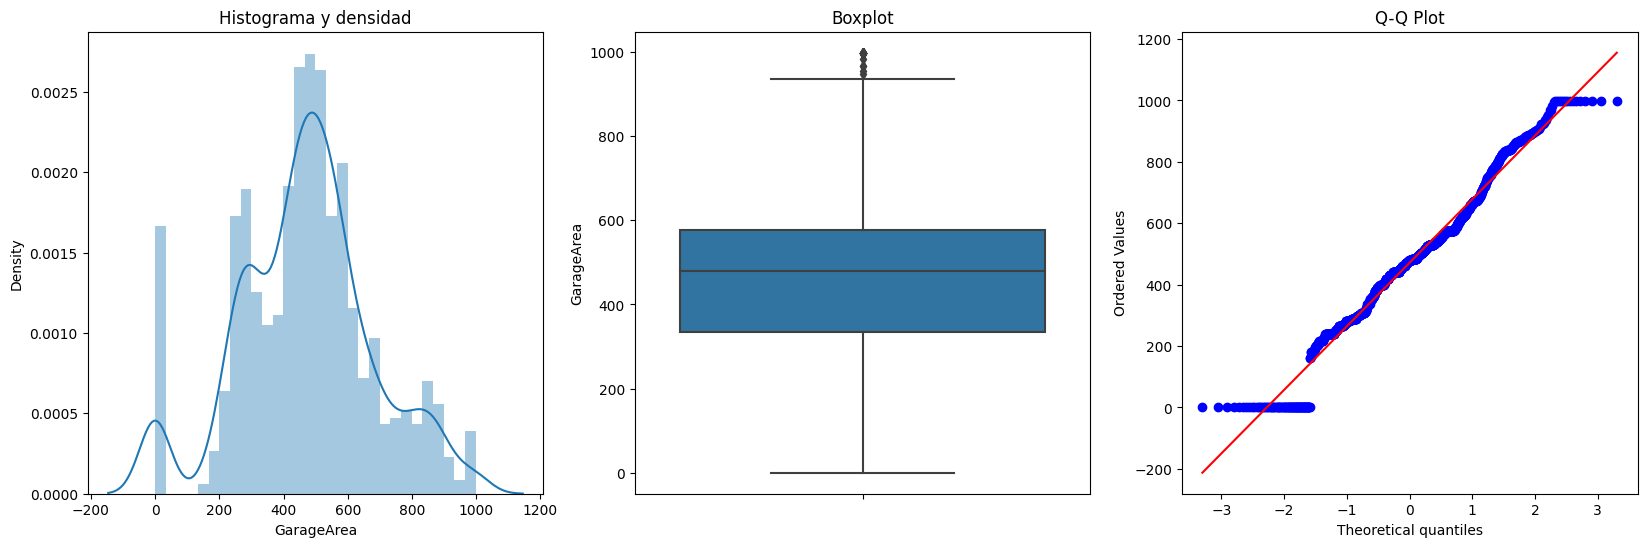

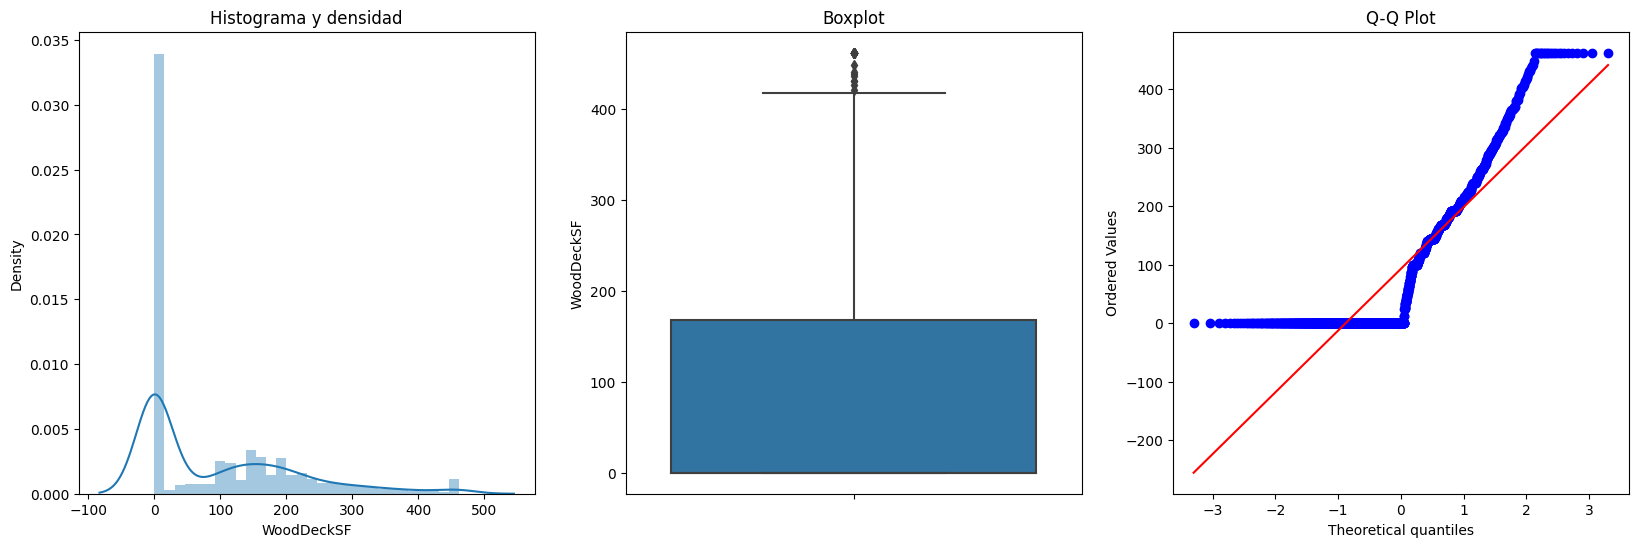

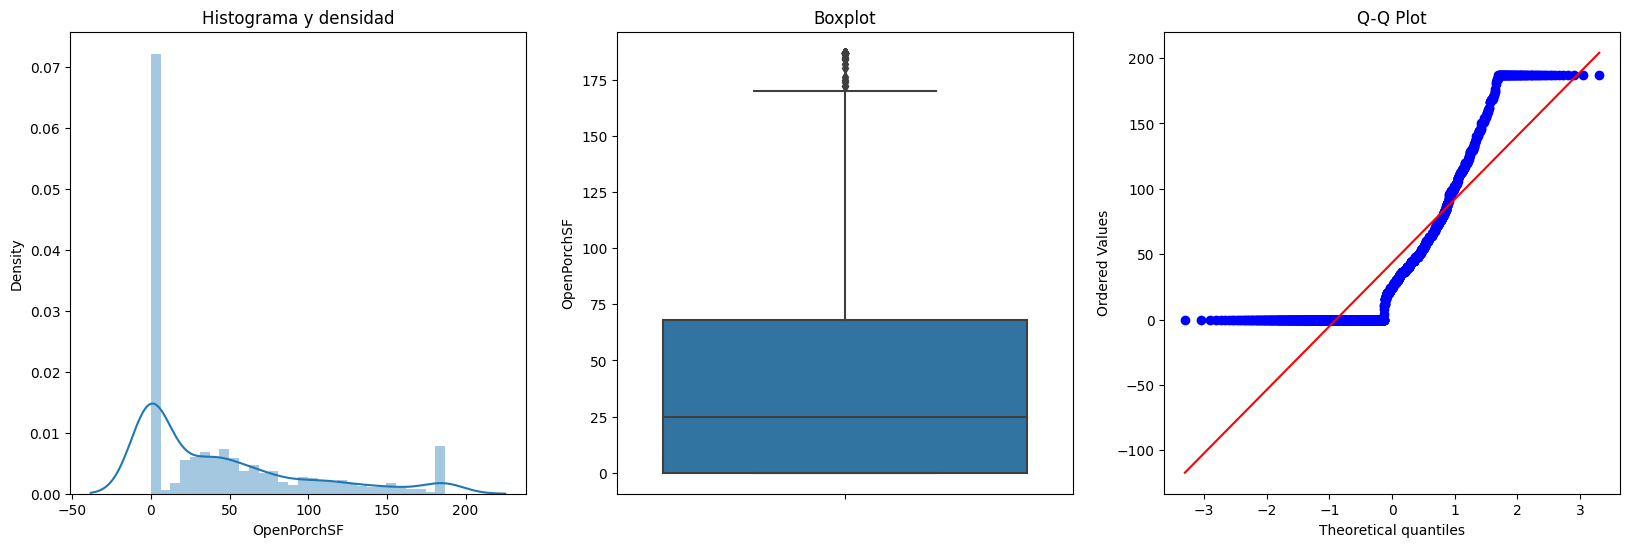

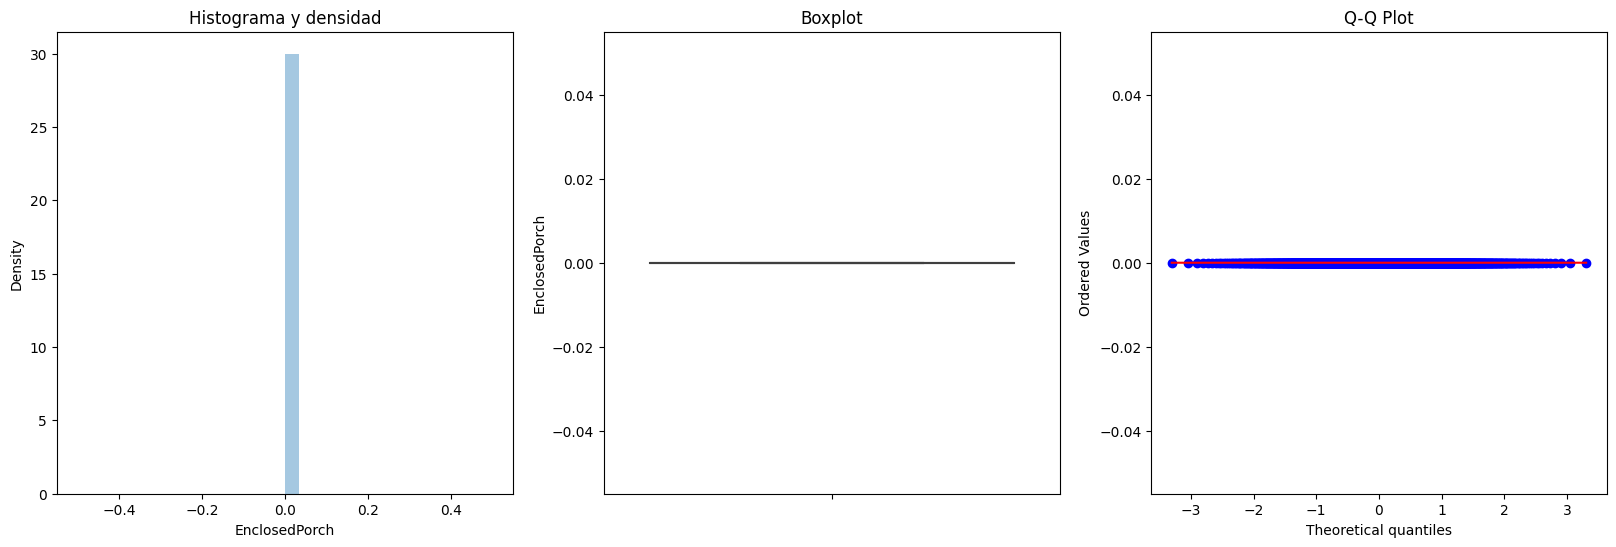

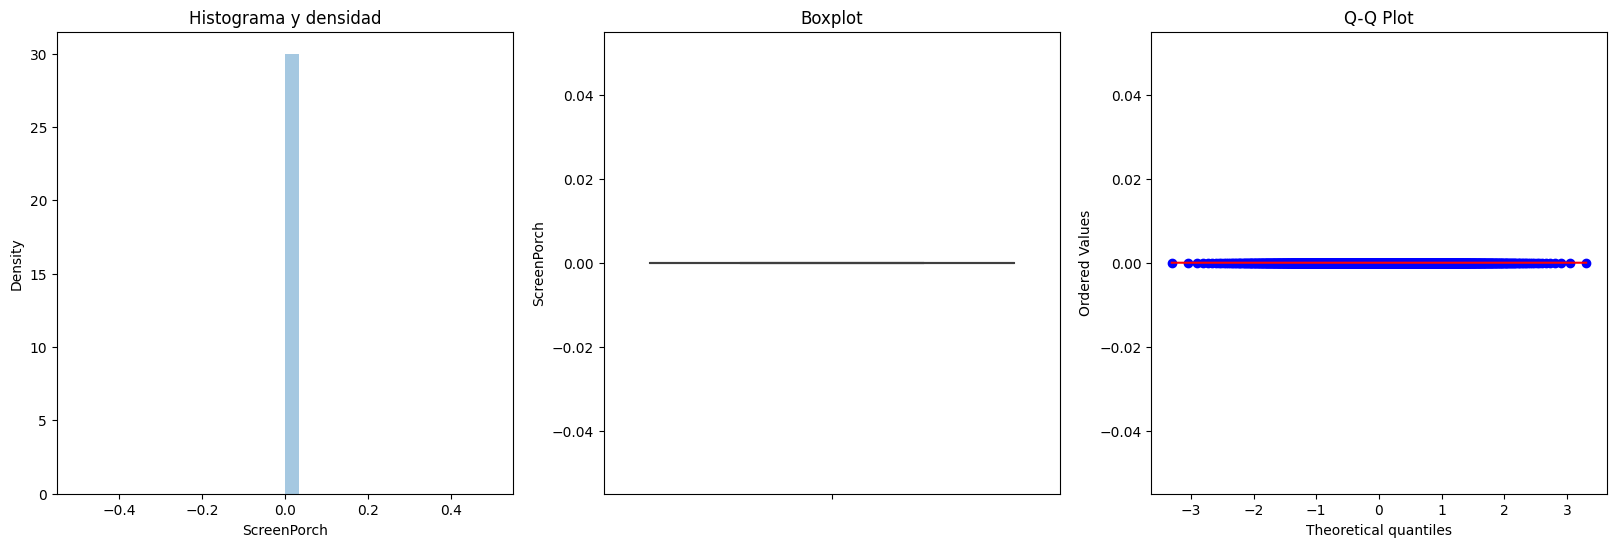

In [257]:
plotDistBoxQQ(continuas)